## 60. 単語ベクトルの読み込みと表示Permalink
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [5]:
import gensim.models.keyedvectors as word2vec
model = word2vec.KeyedVectors.load_word2vec_format('model/GoogleNews-vectors-negative300.bin', binary=True)
model["United_States"]

## 61. 単語の類似度Permalink
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [9]:
model.similarity("United_States","U.S.")

0.73107743

## 62. 類似度の高い単語10件Permalink
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [10]:
model.most_similar("United_States")

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジーPermalink
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [11]:
model.most_similar(positive=["Spain","Athens"],negative=["Madrid"])

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.5168809294700623),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

## 64. アナロジーデータでの実験Permalink
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [23]:
import pandas as pd
data = pd.read_csv("./data/capital.txt",sep=" ").reset_index()
data.columns = ["vec1","vec2","vec3","answer"]
data

,vec1,vec2,vec3,answer
0,Athens,Greece,Baghdad,Iraq
1,Athens,Greece,Bangkok,Thailand
2,Athens,Greece,Beijing,China
3,Athens,Greece,Berlin,Germany
4,Athens,Greece,Bern,Switzerland
...,...,...,...,...
19552,write,writes,talk,talks
19553,write,writes,think,thinks
19554,write,writes,vanish,vanishes
19555,write,writes,walk,walks


In [29]:
words = []
similarity = []
for index,row in data.iterrows():
    print(index)
    try:
        most_simiar = model.most_similar(positive=[row.vec2,row.vec3],negative=[row.vec1])
    except Exception:
        words.append("")
        similarity.append(0.0)
        continue
    print(most_simiar[0])
    words.append(most_simiar[0][0])
    similarity.append(most_simiar[0][1])
data["similar_word"] = words
data["similarity"] = similarity
len(data[data.answer == data.similar_word]) / len(data)

0
('Iraqi', 0.6351870894432068)
1
('Thailand', 0.7137669324874878)
2
('China', 0.7235777378082275)
3
('Germany', 0.6734622716903687)
4
('Switzerland', 0.4919748306274414)
5
('Egypt', 0.7527809739112854)
6
('Australia', 0.5837326645851135)
7
('Viet_Nam', 0.6276342272758484)
8
('Cuba', 0.6460990905761719)
9
('Finland', 0.6899982690811157)
10
('Pakistan', 0.7233326435089111)
11
('Afghan', 0.6160916090011597)
12
('Britain', 0.5646187663078308)
13
('Spain', 0.703661322593689)
14
('Russia', 0.7382972240447998)
15
('Norway', 0.6470744013786316)
16
('Canada', 0.5912168622016907)
17
('France', 0.6724624037742615)
18
('Italy', 0.6826189756393433)
19
('Sweden', 0.6757243871688843)
20
('Iran', 0.7671369910240173)
21
('Japan', 0.7256094813346863)
22
('Thailand', 0.6745355129241943)
23
('China', 0.6915649175643921)
24
('Germany', 0.6057409048080444)
25
('coach_Bobby_Curlings', 0.4347156882286072)
26
('Egypt', 0.6848487854003906)
27
('Mr_Rudd', 0.6186109185218811)
28
('Vietnam', 0.749355137348175)
29

('Egypt', 0.7302724719047546)
239
('Australia', 0.6987782716751099)
240
('Viet_Nam', 0.6931595206260681)
241
('Cuba', 0.6899741888046265)
242
('Afghan', 0.7332904934883118)
243
('Britain', 0.6056548953056335)
244
('Spain', 0.6914529800415039)
245
('Russia', 0.831927478313446)
246
('Norway', 0.6795673370361328)
247
('Canada', 0.6421678066253662)
248
('France', 0.6944429874420166)
249
('Italy', 0.6518086194992065)
250
('Sweden', 0.7098784446716309)
251
('Iran', 0.8605973720550537)
252
('Japan', 0.7747603058815002)
253
('Greece', 0.6418431401252747)
254
('Iraqi', 0.7481118440628052)
255
('Thailand', 0.7783142328262329)
256
('China', 0.8079829812049866)
257
('Germany', 0.7216540575027466)
258
('Switzerland', 0.4968326687812805)
259
('Egypt', 0.7879177927970886)
260
('Australia', 0.7616326808929443)
261
('Viet_Nam', 0.7534359693527222)
262
('Cuba', 0.7958503365516663)
263
('Finland', 0.6935101747512817)
264
('EURASIAN_NATURAL_RESOURCES_CORP.', 0.5547584891319275)
265
('Spain', 0.61560046672

('Viet_Nam', 0.7534171938896179)
472
('Cuba', 0.833503782749176)
473
('Finland', 0.6951574683189392)
474
('Pakistan', 0.8478929996490479)
475
('Afghan', 0.7277183532714844)
476
('Britain', 0.6258983016014099)
477
('Spain', 0.7075908184051514)
478
('Russia', 0.8626428246498108)
479
('Norway', 0.7017198204994202)
480
('Canada', 0.6508046388626099)
481
('France', 0.6808171272277832)
482
('Italy', 0.6060930490493774)
483
('Sweden', 0.7119142413139343)
484
('Greece', 0.6701824069023132)
485
('Iraq', 0.700536847114563)
486
('Thailand', 0.8329713940620422)
487
('China', 0.8427805304527283)
488
('Germany', 0.7607141733169556)
489
('Switzerland', 0.48349660634994507)
490
('Egypt', 0.7604711055755615)
491
('Australia', 0.7408984303474426)
492
('Viet_Nam', 0.7667807936668396)
493
('Cuba', 0.7668194770812988)
494
('Finland', 0.7938802242279053)
495
('Pakistan', 0.7943655252456665)
496
('Afghanistan', 0.6684215068817139)
497
('Britain', 0.7236440777778625)
498
('Spain', 0.7904621958732605)
499
('Ru

('Botswana', 0.685871422290802)
700
('Charles_Kupchan_professor', 0.4881702959537506)
701
('Viet_Nam', 0.7313085794448853)
702
('Vanuatu', 0.5375214219093323)
703
('Turkmenistan', 0.6730562448501587)
704
('Eritrea', 0.6578670740127563)
705
('Kazakhstan', 0.48064327239990234)
706
('Greece', 0.5160377621650696)
707
('Iraq', 0.5886110663414001)
708
('Azerbaijan', 0.6935055255889893)
709
('Mali', 0.5679625868797302)
710
('Thailand', 0.6717178821563721)
711
('Gambia', 0.6164911985397339)
712
('China', 0.6672717332839966)
713
('Lebanon', 0.5812000632286072)
714
('Serbia', 0.6138866543769836)
715
('Belize', 0.596030592918396)
716
('Germany', 0.5521805286407471)
717
('coach_Bobby_Curlings', 0.4199363887310028)
718
('Kyrgyzstan', 0.6895140409469604)
719
('Slovakia', 0.5463588833808899)
720
('EU', 0.5825178623199463)
721
('Romania', 0.64715176820755)
722
('Hungary', 0.6144480109214783)
723
('Burundi', 0.6358797550201416)
724
('Egypt', 0.6739001274108887)
725
('Australia', 0.6014400124549866)
726

('Bangladesh', 0.6812623143196106)
923
('WTO_Doha', 0.5610008239746094)
924
('Ireland', 0.7463322281837463)
925
('Tajikistan', 0.6487239599227905)
926
('outlying_islands', 0.47152939438819885)
927
('Botswana', 0.6718490123748779)
928
('Villanova', 0.5431659817695618)
929
('Viet_Nam', 0.6276342272758484)
930
('Zimbabwe', 0.6975060105323792)
931
('Cuba', 0.6460990905761719)
932
('Finland', 0.6899982690811157)
933
('Pakistan', 0.7233326435089111)
934
('Indonesia', 0.7146178483963013)
935
('Afghan', 0.6160916090011597)
936
('Azerbaijan', 0.7503222227096558)
937
('Senegal', 0.5555755496025085)
938
('Thailand', 0.6745355129241943)
939
('Gambia', 0.6460317969322205)
940
('China', 0.6915649175643921)
941
('Lebanon', 0.7414786219596863)
942
('Serbia', 0.6765246391296387)
943
('Belize', 0.5882230997085571)
944
('Germany', 0.6057409048080444)
945
('coach_Bobby_Curlings', 0.4347156882286072)
946
('Kyrgyzstan', 0.7093477845191956)
947
('Slovakia', 0.5874163508415222)
948
('EU', 0.6050641536712646)


('Moldova', 0.7187772989273071)
1146
('capital_Conakry', 0.6276556253433228)
1147
('Copenhagen_Denmark', 0.6015613079071045)
1148
('Dakar_Rally', 0.645729660987854)
1149
('Syria', 0.7566969990730286)
1150
('Bangladesh', 0.7874110341072083)
1151
('WTO_Doha', 0.6112160682678223)
1152
('Ireland', 0.7370355725288391)
1153
('Tajikistan', 0.7178281545639038)
1154
('coral_islets', 0.5139936804771423)
1155
('Botswana', 0.7200965881347656)
1156
('Seton_Hall', 0.5175719857215881)
1157
('Viet_Nam', 0.7793145775794983)
1158
('Zimbabwe', 0.7605262994766235)
1159
('Cuba', 0.7189655900001526)
1160
('Finland', 0.7141392827033997)
1161
('Pakistan', 0.8062407374382019)
1162
('Indonesia', 0.811772882938385)
1163
('Afghan', 0.6770888566970825)
1164
('Uganda', 0.7837831377983093)
1165
('Nepal', 0.761866569519043)
1166
('Sudan', 0.8018389940261841)
1167
('Ukraine', 0.8071448802947998)
1168
('Rwanda', 0.751247227191925)
1169
('publicist_Joseph_Carozza', 0.4874160587787628)
1170
('Serbia', 0.6780887246131897)

('Peru', 0.5209615230560303)
1363
('Portugal', 0.6003162860870361)
1364
('Austria', 0.6142242550849915)
1365
('Slovakia', 0.6834548115730286)
1366
('EU', 0.6836265921592712)
1367
('Romania', 0.7642887234687805)
1368
('Hungary', 0.7485014200210571)
1369
('Burundi', 0.7496723532676697)
1370
('Egypt', 0.7715529203414917)
1371
('Australia', 0.699225664138794)
1372
('Venezuela', 0.7684608101844788)
1373
('Moldova', 0.7735968828201294)
1374
("Cote_d'_Ivoire", 0.663503885269165)
1375
('Copenhagen_Denmark', 0.5767205357551575)
1376
('Dakar_Rally', 0.6437373161315918)
1377
('Syria', 0.7806217074394226)
1378
('Bangladesh', 0.8018609285354614)
1379
('Qatar', 0.6078771948814392)
1380
('Ireland', 0.706997275352478)
1381
('Tajikistan', 0.803353488445282)
1382
('Kiribati', 0.5720301866531372)
1383
('Botswana', 0.796242356300354)
1384
('Villanova', 0.5380846261978149)
1385
('Viet_Nam', 0.7368886470794678)
1386
('Zimbabwe', 0.8276698589324951)
1387
('Cuba', 0.7855091094970703)
1388
('Finland', 0.662454

('Nepal', 0.7510044574737549)
1584
('Sudan', 0.7986235022544861)
1585
('Ukraine', 0.7746481895446777)
1586
('Rwanda', 0.7706887722015381)
1587
('publicist_Joseph_Carozza', 0.48543864488601685)
1588
('Gabon', 0.6577180027961731)
1589
('Malawi', 0.658211350440979)
1590
('Peru', 0.612380862236023)
1591
('Lion_Bertie_Auld', 0.6052042841911316)
1592
('Slovenian', 0.6127652525901794)
1593
('Britain', 0.5788041949272156)
1594
('Angola', 0.6746979355812073)
1595
('Zambia', 0.7342292070388794)
1596
('Spain', 0.6243974566459656)
1597
('Nicaragua', 0.7040581107139587)
1598
('Bahrain', 0.6864603757858276)
1599
('Australia', 0.6811555624008179)
1600
('Venezuela', 0.7967398762702942)
1601
('Moldova', 0.7341817617416382)
1602
('Guinea', 0.6395460963249207)
1603
('Denmark', 0.6036932468414307)
1604
('Mauritania', 0.6445457935333252)
1605
('Syria', 0.8117659091949463)
1606
('Bangladesh', 0.7952538728713989)
1607
('Qatar', 0.5935311913490295)
1608
('Ireland', 0.7628155946731567)
1609
('Tajikistan', 0.75

('Old_Dominion', 0.45589372515678406)
1803
('Viet_Nam', 0.6742709279060364)
1804
('Zimbabwe', 0.621654748916626)
1805
('Cuba', 0.6382362246513367)
1806
('Finland', 0.7126044034957886)
1807
('Pakistan', 0.686772346496582)
1808
('Indonesia', 0.6724779605865479)
1809
('Afghan', 0.5578824281692505)
1810
('Uganda', 0.6791708469390869)
1811
('Nepal', 0.6357929706573486)
1812
('Sudan', 0.6620485782623291)
1813
('Ukraine', 0.7040975689888)
1814
('Rwanda', 0.6136929988861084)
1815
('Pembroke', 0.4610031843185425)
1816
('Gabon', 0.6188380122184753)
1817
('Malawi', 0.5952726602554321)
1818
('Peru', 0.4810897409915924)
1819
('Portugal', 0.5758466124534607)
1820
('Celje', 0.6110337972640991)
1821
('Britain', 0.6124943494796753)
1822
('Lubango', 0.6058517694473267)
1823
('Zambia', 0.6428410410881042)
1824
('Spain', 0.7382968664169312)
1825
('Nicaragua', 0.5964273810386658)
1826
('Bahrain', 0.6338063478469849)
1827
('Philippines', 0.694970428943634)
1828
('Mozambique', 0.6473879218101501)
1829
('Bela

('Nassau_County', 0.5802626609802246)
2027
('Senegal', 0.6018356680870056)
2028
('Kiribati', 0.5062360763549805)
2029
('Botswana', 0.7498409152030945)
2030
('George_Mason', 0.5382751226425171)
2031
('Viet_Nam', 0.7190651893615723)
2032
('Zimbabwe', 0.7990796566009521)
2033
('Cuba', 0.7563062310218811)
2034
('Finland', 0.6852341294288635)
2035
('Pakistan', 0.8033263683319092)
2036
('Indonesia', 0.8048915266990662)
2037
('Afghanistan', 0.6694600582122803)
2038
('Uganda', 0.808373212814331)
2039
('Nepal', 0.7935711145401001)
2040
('Sudan', 0.8243206739425659)
2041
('Ukraine', 0.8060577511787415)
2042
('Rwanda', 0.7517337203025818)
2043
('Jamaica', 0.5237041115760803)
2044
('Gabon', 0.7148282527923584)
2045
('Malawi', 0.7252763509750366)
2046
('Peru', 0.6423391699790955)
2047
('Portugal', 0.6282909512519836)
2048
('Slovenia', 0.6553377509117126)
2049
('Britain', 0.5896647572517395)
2050
('Angola', 0.7145067453384399)
2051
('Zambia', 0.8036153316497803)
2052
('Spain', 0.6935614943504333)
20

('Somalia', 0.7754021883010864)
2249
('Liberia', 0.7187709808349609)
2250
('Uruguay', 0.609799861907959)
2251
('Russia', 0.8225130438804626)
2252
('Oman', 0.5824606418609619)
2253
('Kenya', 0.8333364129066467)
2254
('Nassau_County', 0.6027827262878418)
2255
('Niger', 0.6535026431083679)
2256
('Cyprus', 0.7273138165473938)
2257
('Mauritania', 0.6967645287513733)
2258
('Norway', 0.4938298165798187)
2259
('Norway', 0.6476561427116394)
2260
('Canada', 0.6383849382400513)
2261
('Suriname', 0.6557367444038391)
2262
('Finland', 0.6971813440322876)
2263
('Pakistan', 0.8123713731765747)
2264
('Indonesia', 0.7973571419715881)
2265
('Afghanistan', 0.7092918157577515)
2266
('Uganda', 0.8083820343017578)
2267
('Nepal', 0.7907785773277283)
2268
('Sudan', 0.8125866055488586)
2269
('Ukraine', 0.8125502467155457)
2270
('Rwanda', 0.7447344660758972)
2271
('Jamaica', 0.5593847632408142)
2272
('Gabon', 0.68241947889328)
2273
('Malawi', 0.7213884592056274)
2274
('Peru', 0.6071662306785583)
2275
('Portugal'

('Nicaragua', 0.7717270255088806)
2472
('Bahrain', 0.735896646976471)
2473
('Philippines', 0.7874776721000671)
2474
('Mozambique', 0.8090156316757202)
2475
('Belarus', 0.7624917030334473)
2476
('Somalia', 0.7639687061309814)
2477
('Liberia', 0.7395594120025635)
2478
('Argentina', 0.583096981048584)
2479
('Russia', 0.8050897717475891)
2480
('Oman', 0.6128698587417603)
2481
('Kenya', 0.8371762633323669)
2482
('Nassau_County', 0.6019945740699768)
2483
('Niger', 0.6549758315086365)
2484
('Cyprus', 0.7120464444160461)
2485
('Mauritania', 0.6890544891357422)
2486
('Sisimiut', 0.5368233919143677)
2487
('Norway', 0.6970164775848389)
2488
('Canada', 0.6691600680351257)
2489
('Suriname', 0.6758505702018738)
2490
('France', 0.7024801969528198)
2491
('Croatia', 0.6597189903259277)
2492
('Ecuador', 0.7554306387901306)
2493
('Morocco', 0.6676663160324097)
2494
('Latvia', 0.6627485752105713)
2495
('Italy', 0.6388795971870422)
2496
('Sudan', 0.823604941368103)
2497
('Ukraine', 0.8321393728256226)
2498

('Slovenia', 0.6340126991271973)
2695
('Britain', 0.5521629452705383)
2696
('Angola', 0.6655552387237549)
2697
('Zambia', 0.7293127775192261)
2698
('Spain', 0.676673948764801)
2699
('Nicaragua', 0.678260326385498)
2700
('Bahrain', 0.7111392021179199)
2701
('Philippines', 0.7043641805648804)
2702
('Mozambique', 0.7391586303710938)
2703
('Belarus', 0.7028733491897583)
2704
('Somalia', 0.7029075622558594)
2705
('Liberia', 0.655174732208252)
2706
('Uruguay', 0.5782584547996521)
2707
('Russia', 0.7564668655395508)
2708
('Oman', 0.5960216522216797)
2709
('Kenya', 0.7303243279457092)
2710
('Nassau_County', 0.5552568435668945)
2711
('Niger', 0.6541614532470703)
2712
('Cyprus', 0.6504871845245361)
2713
('Mauritania', 0.7009226083755493)
2714
('Norway', 0.5010533332824707)
2715
('Norway', 0.6747469902038574)
2716
('Canada', 0.555255651473999)
2717
('Suriname', 0.6602140665054321)
2718
('France', 0.6211393475532532)
2719
('Albania', 0.6619966626167297)
2720
('Ecuador', 0.6813787221908569)
2721
('

('Macedonia', 0.6899296641349792)
2917
('Bulgaria', 0.6064447164535522)
2918
('Sweden', 0.6610990762710571)
2919
('Nadroga', 0.6042811870574951)
2920
('Taiwan', 0.6184728145599365)
2921
('Estonia', 0.626494824886322)
2922
('Uzbekistan', 0.573802649974823)
2923
('Armenia', 0.5744171142578125)
2924
('Honduras', 0.5843697190284729)
2925
('Zambia', 0.7127909064292908)
2926
('Spain', 0.6091192364692688)
2927
('Nicaragua', 0.6621215343475342)
2928
('Bahrain', 0.6418941020965576)
2929
('Philippines', 0.6655749082565308)
2930
('Mozambique', 0.7333983182907104)
2931
('Belarus', 0.680088222026825)
2932
('Somalia', 0.6958955526351929)
2933
('Liberia', 0.6247702240943909)
2934
('Uruguay', 0.551243782043457)
2935
('Russia', 0.7337868809700012)
2936
('Oman', 0.5551839470863342)
2937
('Kenya', 0.7311437129974365)
2938
('Jamaica', 0.4770492911338806)
2939
('Niger', 0.6218728423118591)
2940
('Cyprus', 0.5659160614013672)
2941
('Mauritania', 0.612299919128418)
2942
('Greenland', 0.5153883695602417)
2943

('Ecuador', 0.7340120077133179)
3139
('Morocco', 0.6830668449401855)
3140
('Latvia', 0.7293358445167542)
3141
('Italy', 0.694879412651062)
3142
('Warroad', 0.5221760869026184)
3143
('Chile', 0.6312707662582397)
3144
('Macedonia', 0.784385621547699)
3145
('Bulgaria', 0.7640636563301086)
3146
('Sweden', 0.7705456018447876)
3147
('Fiji', 0.6781085133552551)
3148
('Taiwan', 0.7825954556465149)
3149
('Estonia', 0.7860442996025085)
3150
('Uzbekistan', 0.7826659083366394)
3151
('Moldova', 0.7108835577964783)
3152
('Honduras', 0.6470116376876831)
3153
('Iran', 0.8042643666267395)
3154
('Bhutan', 0.7097139954566956)
3155
('Albania', 0.74625563621521)
3156
('Japan', 0.8140809535980225)
3157
('Libya', 0.6564990878105164)
3158
('Tunisia', 0.7060784697532654)
3159
('Belarus', 0.7625791430473328)
3160
('Somalia', 0.7323047518730164)
3161
('Liberia', 0.6903517842292786)
3162
('Peru', 0.5779755115509033)
3163
('Russia', 0.7946954369544983)
3164
('Oman', 0.6287693381309509)
3165
('Kenya', 0.80657553672

('Norway', 0.7606369853019714)
3362
('Canada', 0.7216339111328125)
3363
('Suriname', 0.6907658576965332)
3364
('France', 0.8050408959388733)
3365
('Serbia', 0.7100810408592224)
3366
('Ecuador', 0.7385086417198181)
3367
('Morocco', 0.671177864074707)
3368
('Latvia', 0.7282897233963013)
3369
('Italy', 0.7074910998344421)
3370
('Warroad', 0.5429131984710693)
3371
('Mendoza', 0.6177366375923157)
3372
('Macedonia', 0.7735538482666016)
3373
('Bulgaria', 0.7689635753631592)
3374
('Sweden', 0.8054226040840149)
3375
('Lautoka', 0.7243965268135071)
3376
('Taiwan', 0.8076635003089905)
3377
('Estonia', 0.7909178733825684)
3378
('Uzbekistan', 0.7952475547790527)
3379
('Azerbaijan', 0.6887180805206299)
3380
('Honduras', 0.6350482106208801)
3381
('Iran', 0.8776856660842896)
3382
('Bhutan', 0.7218862175941467)
3383
('Albania', 0.7458634376525879)
3384
('Japan', 0.8773881793022156)
3385
('Libya', 0.7465243339538574)
3386
('Tunisia', 0.7394596934318542)
3387
('Liechtenstein', 0.6487268805503845)
3388
('

('Namibia', 0.6975002288818359)
3584
('Armenia', 0.7355786561965942)
3585
('Croatia', 0.7579498291015625)
3586
('Nigeria', 0.7162243723869324)
3587
('Ghana', 0.7035733461380005)
3588
('Greenland', 0.5120279788970947)
3589
('Norway', 0.610365092754364)
3590
('Canada', 0.5560863018035889)
3591
('Suriname', 0.658329427242279)
3592
('France', 0.5908311605453491)
3593
('Serbia', 0.6367804408073425)
3594
('Ecuador', 0.6770126223564148)
3595
('Morocco', 0.6385489702224731)
3596
('Latvia', 0.6278846263885498)
3597
('Italy', 0.5678404569625854)
3598
('St._Croix', 0.48891523480415344)
3599
('Peru', 0.5784194469451904)
3600
('Macedonia', 0.7317103147506714)
3601
('Bulgaria', 0.6531034708023071)
3602
('Sweden', 0.593579113483429)
3603
('Fiji', 0.6320008039474487)
3604
('Taiwan', 0.6785945296287537)
3605
('Estonia', 0.6637351512908936)
3606
('Uzbekistan', 0.7006022930145264)
3607
('Moldova', 0.6460931897163391)
3608
('Honduras', 0.6062048077583313)
3609
('Iran', 0.7643213272094727)
3610
('Bhutan', 

('Marsaxlokk', 0.6161985397338867)
3807
('Austria', 0.6997698545455933)
3808
('Laos', 0.6106023192405701)
3809
('Lithuania', 0.6950147151947021)
3810
('Poland', 0.785804271697998)
3811
('Namibia', 0.7048429846763611)
3812
('Armenia', 0.7482723593711853)
3813
('Croatia', 0.7850274443626404)
3814
('Nigeria', 0.7231115698814392)
3815
('Ghana', 0.7395906448364258)
3816
('Algeria', 0.6083253622055054)
3817
('Jordanian', 0.5675362348556519)
3818
('Turkey', 0.7553209066390991)
3819
('Ravalomanana', 0.5844866633415222)
3820
('Samoa', 0.6014944911003113)
3821
('Turkmenistan', 0.674048662185669)
3822
('Ecuador', 0.6764630079269409)
3823
('Morocco', 0.588347852230072)
3824
('Latvia', 0.5820817947387695)
3825
('Italy', 0.5438134074211121)
3826
('St._Croix', 0.4899190366268158)
3827
('Perez', 0.64511638879776)
3828
('Macedonia', 0.7102298140525818)
3829
('Bulgaria', 0.5922530293464661)
3830
('Sweden', 0.5630752444267273)
3831
('Fiji', 0.6215229034423828)
3832
('Taiwan', 0.6480554938316345)
3833
('E

('Albania', 0.5498563051223755)
4030
('Japan', 0.586567759513855)
4031
('Benghazi', 0.5777480602264404)
4032
('Tunisia', 0.5380558371543884)
4033
('Croatia', 0.46157747507095337)
4034
('Malta', 0.5652061700820923)
4035
('Vienna_Austria', 0.5024473667144775)
4036
('Lao', 0.4811117649078369)
4037
('Lithuania', 0.522949755191803)
4038
('Poland', 0.4988584518432617)
4039
('Namibia', 0.5817958116531372)
4040
('Armenia', 0.5766348242759705)
4041
('Croatia', 0.6200721263885498)
4042
('Nigeria', 0.6103495955467224)
4043
('Ghana', 0.6139946579933167)
4044
('Morocco', 0.4548300802707672)
4045
('Amman_Jordan', 0.5343512296676636)
4046
('Turkey', 0.5716211199760437)
4047
('capital_Antananarivo', 0.4936065375804901)
4048
('Vanuatu', 0.5291681885719299)
4049
('Turkmenistan', 0.5175139307975769)
4050
('Eritrea', 0.5636643171310425)
4051
('Kelme', 0.45480841398239136)
4052
('Athens_Greece', 0.5610514283180237)
4053
('Iraqi', 0.6046715974807739)
4054
('Azerbaijan', 0.6024165749549866)
4055
('Mali', 0.5

('Serbia', 0.7289468050003052)
4251
('Estonia', 0.7226682901382446)
4252
('Uzbekistan', 0.6808198094367981)
4253
('Abkhazia', 0.7038648128509521)
4254
('Honduran', 0.6368536949157715)
4255
('Iran', 0.8420110940933228)
4256
('Bhutan', 0.6782910227775574)
4257
('Albania', 0.6894389986991882)
4258
('Japan', 0.7980254888534546)
4259
('Libya', 0.7004387974739075)
4260
('Tunisia', 0.6652894020080566)
4261
('Liechtenstein', 0.6044073700904846)
4262
('Malta', 0.651429295539856)
4263
('Austria', 0.5920237898826599)
4264
('Laos', 0.6273549199104309)
4265
('Lithuania', 0.6455850601196289)
4266
('Poland', 0.7217838764190674)
4267
('Namibia', 0.7033320665359497)
4268
('Armenia', 0.7917428612709045)
4269
('Croatia', 0.7399297952651978)
4270
('Nigeria', 0.7622596025466919)
4271
('Kumasi', 0.7170441150665283)
4272
('Algeria', 0.5293050408363342)
4273
('Jordanian', 0.585953414440155)
4274
('Turkey', 0.7700877785682678)
4275
('Ravalomanana', 0.6132571697235107)
4276
('Vanuatu', 0.5756580829620361)
4277


('Iraq', 0.775810718536377)
4472
('Azerbaijan', 0.8580082654953003)
4473
('Mali', 0.6464541554450989)
4474
('Thailand', 0.8036007881164551)
4475
('Gambia', 0.7299395203590393)
4476
('China', 0.8198246955871582)
4477
('Lebanon', 0.7321009635925293)
4478
('Serbia', 0.7584357857704163)
4479
('Belize', 0.640987753868103)
4480
('Germany', 0.6948080062866211)
4481
('coach_Bobby_Curlings', 0.5130249857902527)
4482
('Kyrgyzstan', 0.7992039918899536)
4483
('Slovakia', 0.686567485332489)
4484
('EU', 0.715236246585846)
4485
('Albania', 0.7016173005104065)
4486
('Japan', 0.6753293871879578)
4487
('Libya', 0.6374210119247437)
4488
('Tunisia', 0.6611813902854919)
4489
('Liechtenstein', 0.6172218918800354)
4490
('Malta', 0.651099681854248)
4491
('Austria', 0.5996199250221252)
4492
('Laos', 0.6869222521781921)
4493
('Lithuania', 0.6473378539085388)
4494
('Poland', 0.6493333578109741)
4495
('Namibia', 0.7032482624053955)
4496
('Armenia', 0.7686421275138855)
4497
('Croatia', 0.7408009171485901)
4498
('N

('Samoa', 0.5444455146789551)
4695
('Turkmenistan', 0.619691789150238)
4696
('Eritrea', 0.6230981349945068)
4697
('Astana_cycling', 0.5134337544441223)
4698
('Greece', 0.4641447067260742)
4699
('Iraqi', 0.6433994770050049)
4700
('Azerbaijan', 0.6907507181167603)
4701
('Burkina_Faso', 0.5263786911964417)
4702
('Thailand', 0.6068312525749207)
4703
('Gambia', 0.6068776249885559)
4704
('China', 0.6587847471237183)
4705
('Lebanon', 0.6189270615577698)
4706
('Serbia', 0.6308674216270447)
4707
('Belize', 0.5653215050697327)
4708
('Germany', 0.5527234673500061)
4709
('coach_Bobby_Curlings', 0.45349496603012085)
4710
('Kyrgyz', 0.6425043940544128)
4711
('Slovakia', 0.5582301616668701)
4712
('EU', 0.6030415296554565)
4713
('Romania', 0.613120436668396)
4714
('Hungary', 0.5742425322532654)
4715
('Burundi', 0.595880389213562)
4716
('Egypt', 0.5802777409553528)
4717
('Australia', 0.5924859046936035)
4718
('Venezuela', 0.6299804449081421)
4719
('Vienna_Austria', 0.6166977882385254)
4720
('Laos', 0.6

('Nigeria', 0.7595155239105225)
4917
('Ghana', 0.760064959526062)
4918
('Algeria', 0.630317211151123)
4919
('Morocco', 0.5791529417037964)
4920
('Turkey', 0.7436579465866089)
4921
('Madagascar', 0.6080743670463562)
4922
('Samoa', 0.639165997505188)
4923
('Turkmenistan', 0.7507942914962769)
4924
('Eritrea', 0.7454376816749573)
4925
('Kazakhstan', 0.577869176864624)
4926
('Greece', 0.5813656449317932)
4927
('Iraqi', 0.6902862787246704)
4928
('Azerbaijan', 0.7918488383293152)
4929
('Burkina_Faso', 0.6750099658966064)
4930
('Thailand', 0.7547832131385803)
4931
('Gambia', 0.7304520010948181)
4932
('China', 0.7632207274436951)
4933
('Lebanon', 0.6218209862709045)
4934
('Serbia', 0.749875545501709)
4935
('Belize', 0.6093316078186035)
4936
('Germany', 0.6527091860771179)
4937
('Switzerland', 0.46789368987083435)
4938
('Kyrgyzstan', 0.7548983097076416)
4939
('Slovakia', 0.7082417011260986)
4940
('EU', 0.6708400249481201)
4941
('Romania', 0.7711660861968994)
4942
('Hungary', 0.6972097158432007)


('malt_whiskey', 0.4664456248283386)
5139
('aquavit', 0.43614211678504944)
5140
('baht', 0.4975159168243408)
5141
('malt_whiskey', 0.43647530674934387)
5142
('Tennent_lager', 0.373121052980423)
5143
('Vietnam_War', 0.48057371377944946)
5144
('Tennent_lager', 0.382781982421875)
5145
('whiskey', 0.3790664076805115)
5146
('rioja', 0.4685591459274292)
5147
('Bulgarian', 0.4521876275539398)
5148
('Cambodian', 0.4223402738571167)
5149
('Canadian', 0.4315339922904968)
5150
('genuine', 0.41471952199935913)
5151
('Danish', 0.4273563325405121)
5152
('Therein_lays', 0.4209757447242737)
5153
('Hungarian', 0.42113399505615234)
5154
('genuine', 0.46913281083106995)
5155
('Iranians', 0.46914926171302795)
5156
('Japanese', 0.4348074793815613)
5157
('Korean', 0.42006146907806396)
5158
('Latvian', 0.442576140165329)
5159
('Lithuanian', 0.4103516936302185)
5160
('FYROM', 0.4197189211845398)
5161
('genuine', 0.4517399072647095)
5162
("everything'sa", 0.38046517968177795)
5163
('Oyo_State', 0.4881288707256

('krone', 0.665138840675354)
5363
('baht', 0.7073626518249512)
5364
('hryvnia', 0.7282790541648865)
5365
('dollar', 0.41286975145339966)
5366
('dong', 0.5871936082839966)
5367
('Algerian', 0.53849196434021)
5368
('kwanza', 0.5651992559432983)
5369
('peso', 0.6251797676086426)
5370
('hryvnia', 0.6132886409759521)
5371
('reais', 0.6202735304832458)
5372
('zloty', 0.6665818691253662)
5373
('rupiah', 0.5797227025032043)
5374
('loonie', 0.608913779258728)
5375
('zloty', 0.5898317098617554)
5376
('krone', 0.657537579536438)
5377
('euro', 0.5586222410202026)
5378
('Iranian', 0.5850404500961304)
5379
('yen', 0.7752535343170166)
5380
('dong', 0.629736602306366)
5381
('forint', 0.6406992077827454)
5382
('forint', 0.5875685811042786)
5383
('leu', 0.5779768228530884)
5384
('ringgit', 0.7789758443832397)
5385
('peso', 0.7106294631958008)
5386
('naira', 0.7492703795433044)
5387
('zloty', 0.7569897174835205)
5388
('leu', 0.7048006057739258)
5389
('ruble', 0.7970201373100281)
5390
('krone', 0.63927137

('naira', 0.8062037229537964)
5583
('zloty', 0.7763998508453369)
5584
('zloty', 0.6867842674255371)
5585
('rubles', 0.7172518372535706)
5586
('kronor', 0.7040520906448364)
5587
('baht', 0.8204821944236755)
5588
('hryvnia', 0.706962525844574)
5589
('dollar', 0.4248109459877014)
5590
('Vietnam_War', 0.6291875243186951)
5591
('rand', 0.5962463021278381)
5592
('rand', 0.5753042101860046)
5593
('pesos', 0.625822126865387)
5594
('hryvnia', 0.6099382042884827)
5595
('reals', 0.7216888070106506)
5596
('leva', 0.7411125302314758)
5597
('baht', 0.6533722877502441)
5598
('Canadian', 0.6129528284072876)
5599
('kuna', 0.6397308707237244)
5600
('kroner', 0.6947695016860962)
5601
('euros', 0.6097233295440674)
5602
('forints', 0.7399961948394775)
5603
('rupees', 0.7625045776367188)
5604
('Tehran', 0.6569424867630005)
5605
('yen', 0.7928193807601929)
5606
('KRW###', 0.6134586930274963)
5607
('hryvnia', 0.6440278887748718)
5608
('litas', 0.641551673412323)
5609
('kuna', 0.5950475931167603)
5610
('naira'

('kronor', 0.6970704793930054)
5812
('dollar', 0.4140664339065552)
5813
('Vietnamese_dong', 0.6180541515350342)
5814
('dinar', 0.5265251398086548)
5815
('kwanza', 0.6060139536857605)
5816
('peso', 0.6179080605506897)
5817
('leu', 0.5734161734580994)
5818
('reais', 0.5795663595199585)
5819
('levs', 0.6300233006477356)
5820
('Phnom_Penh', 0.5790449380874634)
5821
('loonie', 0.5920822024345398)
5822
('kuna', 0.5313864350318909)
5823
('krone', 0.5684545040130615)
5824
('euro', 0.546983540058136)
5825
('forint', 0.7260885834693909)
5826
('rupee', 0.6978269815444946)
5827
('Tehran', 0.5754074454307556)
5828
('yen', 0.7065061926841736)
5829
('dong', 0.6118350625038147)
5830
('forint', 0.6069300174713135)
5831
('litas', 0.5854756832122803)
5832
('Turkish_lira', 0.5379672050476074)
5833
('ringgit', 0.6958323121070862)
5834
('peso', 0.6378695964813232)
5835
('naira', 0.7537935376167297)
5836
('zloty', 0.7259947657585144)
5837
('leu', 0.6590346693992615)
5838
('ruble', 0.7700984477996826)
5839
('

('Kansas', 0.7347750663757324)
6036
('Texas', 0.549258828163147)
6037
('Fresno', 0.684485912322998)
6038
('Florida', 0.7314643859863281)
6039
('California', 0.5717043280601501)
6040
('Hawaii', 0.759468138217926)
6041
('West_Virginia', 0.615258514881134)
6042
('Kentucky', 0.6477838754653931)
6043
('San_Joaquin', 0.5950738787651062)
6044
('Ohio', 0.614939272403717)
6045
('Alaska', 0.7356427311897278)
6046
('Ohio', 0.6363984942436218)
6047
('Texas', 0.6163259148597717)
6048
('Mayes', 0.5469459295272827)
6049
('Alabama', 0.6973982453346252)
6050
('Indiana', 0.623705267906189)
6051
('Michigan', 0.708452045917511)
6052
('Tennessee', 0.6814407110214233)
6053
('Massachusetts', 0.683786928653717)
6054
('Oregon', 0.6272624731063843)
6055
('Colorado', 0.7362682819366455)
6056
('Maryland', 0.6833738684654236)
6057
('Tennessee', 0.6867355704307556)
6058
('Kentucky', 0.7220224738121033)
6059
('Wisconsin', 0.6987963318824768)
6060
('Oregon', 0.6962535381317139)
6061
('Arizona', 0.6590535640716553)
60

('Kansas', 0.6990789771080017)
6254
('Virginia', 0.5552709698677063)
6255
('California', 0.6312093734741211)
6256
('Florida', 0.6983780860900879)
6257
('Anaheim_Ducks', 0.536195695400238)
6258
('Hawaii', 0.6957058310508728)
6259
('West_Virginia', 0.6056028604507446)
6260
('Kentucky', 0.6193548440933228)
6261
('San_Joaquin', 0.5637850761413574)
6262
('Ohio', 0.653100848197937)
6263
('Alaska', 0.697166919708252)
6264
('Ohio', 0.7199504375457764)
6265
('Flower_Mound', 0.6159147620201111)
6266
('Smith', 0.5611169338226318)
6267
('Florida', 0.6811845898628235)
6268
('Rio_Grande_Valley', 0.5688886642456055)
6269
('Wilson', 0.5227770805358887)
6270
('Wisconsin', 0.6133309006690979)
6271
('Texas', 0.649057149887085)
6272
('Cobb', 0.48990410566329956)
6273
('Oregon', 0.6792820692062378)
6274
('Colorado', 0.6690922975540161)
6275
('Maryland', 0.7200372815132141)
6276
('Tennessee', 0.6310157775878906)
6277
('Kentucky', 0.7631884217262268)
6278
('Wisconsin', 0.7651140093803406)
6279
('Oregon', 0.6

('Wisconsin', 0.7144363522529602)
6469
('Oregon', 0.7193148732185364)
6470
('Arizona', 0.7148773670196533)
6471
('California', 0.65008145570755)
6472
('California', 0.6985890865325928)
6473
('Nevada', 0.5665956735610962)
6474
('Georgia', 0.693415105342865)
6475
('Nebraska', 0.6399762630462646)
6476
('Florida', 0.6942330598831177)
6477
('Oklahoma', 0.7417101263999939)
6478
('California', 0.5480344295501709)
6479
('Ohio', 0.6662448048591614)
6480
('Minnesota', 0.7392157316207886)
6481
('Kansas', 0.7627300024032593)
6482
('Virginia', 0.5726823210716248)
6483
('California', 0.6473786234855652)
6484
('Florida', 0.7498091459274292)
6485
('Anaheim_Ducks', 0.5834659337997437)
6486
('Hawaii', 0.7246803641319275)
6487
('Pennsylvania', 0.7124019265174866)
6488
('San_Joaquin', 0.5606967210769653)
6489
('Ohio', 0.7227973937988281)
6490
('Alaska', 0.7854716181755066)
6491
('Ohio', 0.7222918272018433)
6492
('Flower_Mound', 0.630068838596344)
6493
('Williamson', 0.5485072731971741)
6494
('Florida', 0.

('Ohio', 0.5878387093544006)
6687
('Minnesota', 0.7352355718612671)
6688
('Kansas', 0.7228748798370361)
6689
('Virginia', 0.5141178965568542)
6690
('California', 0.6279704570770264)
6691
('Florida', 0.656981885433197)
6692
('Anaheim_Ducks', 0.5360293984413147)
6693
('Hawaii', 0.6881595253944397)
6694
('Philadelphia', 0.5820531249046326)
6695
('Kentucky', 0.6562351584434509)
6696
('California', 0.5162590742111206)
6697
('Cincinatti', 0.592062771320343)
6698
('Alaska', 0.6367181539535522)
6699
('Ohio', 0.6586822271347046)
6700
('Texas', 0.5698901414871216)
6701
('Robinson', 0.5333427786827087)
6702
('Florida', 0.5901564359664917)
6703
('Rio_Grande_Valley', 0.5892375111579895)
6704
('Wisconsin', 0.6540042161941528)
6705
('Texas', 0.6632811427116394)
6706
('Tennessee', 0.4949847459793091)
6707
('Florida', 0.6051101088523865)
6708
('Nevada', 0.6927986145019531)
6709
('Texas', 0.460591197013855)
6710
('California', 0.5449036955833435)
6711
('California', 0.5694990158081055)
6712
('Oregon', 0

('Minnesota', 0.6179962158203125)
6901
('Kansas', 0.7017041444778442)
6902
('Virginia', 0.5287070870399475)
6903
('Fresno', 0.5959194302558899)
6904
('Florida', 0.726118803024292)
6905
('California', 0.5789542198181152)
6906
('Hawaii', 0.6597937345504761)
6907
('Pennsylvania', 0.6849772334098816)
6908
('Kentucky', 0.6575759053230286)
6909
('San_Joaquin', 0.5661893486976624)
6910
('Alaska', 0.6871734261512756)
6911
('Flower_Mound', 0.5683287978172302)
6912
('Hickman', 0.5321453809738159)
6913
('Florida', 0.6642372608184814)
6914
('Rio_Grande_Valley', 0.5720561146736145)
6915
('Hickman', 0.4773949682712555)
6916
('Wisconsin', 0.6721875071525574)
6917
('Texas', 0.6243284940719604)
6918
('Texas', 0.5145403742790222)
6919
('Fountain_Hills', 0.5360533595085144)
6920
('Florida', 0.5420047640800476)
6921
('Nevada', 0.6710870265960693)
6922
('Fountain_Hills', 0.5827335119247437)
6923
('About_VHA_VHA', 0.48958274722099304)
6924
('Wauseon', 0.5206543207168579)
6925
('California', 0.58214151859283

('Texas', 0.5175182819366455)
7120
('Nevada', 0.4732189178466797)
7121
('Florida', 0.5772716999053955)
7122
('El_Paso', 0.5378084778785706)
7123
('Huppenthal_R', 0.5022761225700378)
7124
('Wisconsin', 0.6004629731178284)
7125
('Texas', 0.5965109467506409)
7126
('Texas', 0.4691045582294464)
7127
('Southern_California', 0.5422951579093933)
7128
('Broward_County', 0.5188577771186829)
7129
('Nevada', 0.6850273609161377)
7130
('Arizona', 0.5684788823127747)
7131
('About_VHA_VHA', 0.47298330068588257)
7132
('Idaho', 0.6437840461730957)
7133
('Louisiana', 0.6677321195602417)
7134
('Puget_Sound', 0.6158315539360046)
7135
('Ohio', 0.6538233160972595)
7136
('Texas', 0.5809736847877502)
7137
('Florida', 0.5676336884498596)
7138
('Alabama', 0.547101616859436)
7139
('Massachusetts', 0.6332492232322693)
7140
('Illinois', 0.6420078873634338)
7141
('Texas', 0.5750574469566345)
7142
('Pennsylvania', 0.652675449848175)
7143
('Arizona', 0.6216334700584412)
7144
('Texas', 0.5930334329605103)
7145
('West_V

('Wisconsin', 0.6393712759017944)
7338
('Texas', 0.7089149355888367)
7339
('Weaver', 0.5287383794784546)
7340
('Arizona', 0.5609312653541565)
7341
('Florida', 0.5672508478164673)
7342
('Nevada', 0.767090916633606)
7343
('Arizona', 0.6810065507888794)
7344
('About_VHA_VHA', 0.4846910834312439)
7345
('California', 0.5487424731254578)
7346
('California', 0.59794682264328)
7347
('Idaho', 0.680473804473877)
7348
('Stanislaus_County', 0.6192768812179565)
7349
('Louisiana', 0.7659159302711487)
7350
('Oregon', 0.626385509967804)
7351
('California', 0.6167883276939392)
7352
('California', 0.4928247332572937)
7353
('Ohio', 0.7227623462677002)
7354
('Texas', 0.6786685585975647)
7355
('Arizona', 0.5609312653541565)
7356
('Florida', 0.6979374885559082)
7357
('Alabama', 0.6400561928749084)
7358
('Massachusetts', 0.6182477474212646)
7359
('Illinois', 0.6588581800460815)
7360
('Texas', 0.6999492645263672)
7361
('Pennsylvania', 0.6685024499893188)
7362
('Arizona', 0.6681379079818726)
7363
('Texas', 0.6

('Fresno', 0.643609881401062)
7555
('Louisiana', 0.6025972962379456)
7556
('Spokane', 0.6099730134010315)
7557
('Southern_California', 0.638460099697113)
7558
('Southern_California', 0.5436877012252808)
7559
('Ohio', 0.6382333636283875)
7560
('El_Paso', 0.6292020082473755)
7561
('Tucson', 0.6072394251823425)
7562
('Florida', 0.6914587616920471)
7563
('Alabama', 0.6041836142539978)
7564
('Massachusetts', 0.5521249771118164)
7565
('Illinois', 0.5951890349388123)
7566
('Texas', 0.6017260551452637)
7567
('Philly', 0.6017205119132996)
7568
('Texas', 0.6055871248245239)
7569
('Florida', 0.6319379210472107)
7570
('Indiana', 0.5605680346488953)
7571
('Texas', 0.6489784121513367)
7572
('Michigan', 0.6361600756645203)
7573
('Tennessee', 0.6106401085853577)
7574
('Massachusetts', 0.5606389045715332)
7575
('Oregon', 0.5983838438987732)
7576
('Colorado', 0.7325631976127625)
7577
('Maryland', 0.617911696434021)
7578
('Tennessee', 0.5978493690490723)
7579
('Kentucky', 0.6205471158027649)
7580
('Wisco

('Florida', 0.7231115102767944)
7772
('Alabama', 0.6778176426887512)
7773
('Massachusetts', 0.627676248550415)
7774
('Illinois', 0.6897852420806885)
7775
('Texas', 0.6658176183700562)
7776
('Pennsylvania', 0.6455948948860168)
7777
('Arizona', 0.686595618724823)
7778
('Texas', 0.6377516984939575)
7779
('Florida', 0.6300591826438904)
7780
('Indiana', 0.6725413203239441)
7781
('Texas', 0.6740416288375854)
7782
('Michigan', 0.7034563422203064)
7783
('Tennessee', 0.7070192694664001)
7784
('Massachusetts', 0.6944136619567871)
7785
('Oregon', 0.615142822265625)
7786
('Colorado', 0.7146873474121094)
7787
('Maryland', 0.7171272039413452)
7788
('Tennessee', 0.6833322048187256)
7789
('Kentucky', 0.7664873600006104)
7790
('Wisconsin', 0.7253583669662476)
7791
('Oregon', 0.7056493163108826)
7792
('Arizona', 0.7834317088127136)
7793
('California', 0.6257769465446472)
7794
('California', 0.7151468396186829)
7795
('Arizona', 0.6346442699432373)
7796
('Georgia', 0.6401764154434204)
7797
('Texas', 0.530

('Massachusetts', 0.6665036678314209)
7987
('Oregon', 0.5490764379501343)
7988
('Colorado', 0.6746034622192383)
7989
('Maryland', 0.6823894381523132)
7990
('Tennessee', 0.6259689927101135)
7991
('Kentucky', 0.7139999866485596)
7992
('Wisconsin', 0.6442720890045166)
7993
('Oregon', 0.6476773023605347)
7994
('Arizona', 0.7238830327987671)
7995
('Arizona', 0.6067339181900024)
7996
('Georgia', 0.5636570453643799)
7997
('Nebraska', 0.5835425853729248)
7998
('Florida', 0.6406340003013611)
7999
('Oklahoma', 0.6756904721260071)
8000
('Ohio', 0.5699864625930786)
8001
('Minnesota', 0.632641077041626)
8002
('Puget_Sound', 0.6729753613471985)
8003
('California', 0.6469343900680542)
8004
('California', 0.5109391212463379)
8005
('Ohio', 0.7240660190582275)
8006
('Texas', 0.6867431402206421)
8007
('Arizona', 0.541179895401001)
8008
('Florida', 0.7112122178077698)
8009
('Alabama', 0.6744044423103333)
8010
('Massachusetts', 0.6601055264472961)
8011
('Illinois', 0.6511207818984985)
8012
('Texas', 0.6325

('Wisconsin', 0.6608498692512512)
8202
('Oregon', 0.6407063007354736)
8203
('Arizona', 0.7154343724250793)
8204
('California', 0.6531338691711426)
8205
('California', 0.6954130530357361)
8206
('Arizona', 0.581514835357666)
8207
('Georgia', 0.5911019444465637)
8208
('Nebraska', 0.6440984606742859)
8209
('Florida', 0.6629530787467957)
8210
('Oklahoma', 0.7440670728683472)
8211
('OAKLAND_Calif._KGO', 0.5433725714683533)
8212
('Ohio', 0.6234854459762573)
8213
('Minnesota', 0.6802476644515991)
8214
('Kansas', 0.7604800462722778)
8215
('California', 0.7104787230491638)
8216
('Florida', 0.7551882863044739)
8217
('Troy_Glaus_3b', 0.5584338307380676)
8218
('Hawaii', 0.6999080181121826)
8219
('Florida', 0.6158105731010437)
8220
('Alabama', 0.6328916549682617)
8221
('Massachusetts', 0.6474118828773499)
8222
('San_Francisco', 0.5737228989601135)
8223
('Texas', 0.6468132138252258)
8224
('New_Jersey', 0.5877021551132202)
8225
('Southern_California', 0.5387489199638367)
8226
('Texas', 0.6323216557502

('woman', 0.8290271759033203)
8422
('niece', 0.8565564155578613)
8423
('policewoman', 0.7025843262672424)
8424
('princess', 0.674161434173584)
8425
('daughter', 0.8802875876426697)
8426
('daughters', 0.8633192777633667)
8427
('sister', 0.6299340128898621)
8428
('mother', 0.7664049863815308)
8429
('stepdaughter', 0.739833414554596)
8430
('aunt', 0.8418983817100525)
8431
('girl', 0.8519493937492371)
8432
('sister', 0.864673912525177)
8433
('mother', 0.8464744687080383)
8434
('grandmother', 0.7323728799819946)
8435
('grandma', 0.7571893930435181)
8436
('granddaughter', 0.7767788171768188)
8437
('bride', 0.5846555829048157)
8438
('she', 0.7056024670600891)
8439
('her', 0.7040696144104004)
8440
('mother', 0.6938971281051636)
8441
('queen', 0.6334689855575562)
8442
('woman', 0.7887567281723022)
8443
('niece', 0.7590569257736206)
8444
('policewoman', 0.6596719622612)
8445
('princess', 0.6662960648536682)
8446
('daughter', 0.8148940801620483)
8447
('daughters', 0.7913922071456909)
8448
('mothe

('grandmother', 0.6898733377456665)
8647
('grandma', 0.7151162624359131)
8648
('granddaughter', 0.7921582460403442)
8649
('bride', 0.6147534847259521)
8650
('she', 0.7601251006126404)
8651
('her', 0.7606525421142578)
8652
('daughter', 0.6421602368354797)
8653
('niece', 0.8202236890792847)
8654
('policewoman', 0.7608712315559387)
8655
('princess', 0.7041179537773132)
8656
('daughter', 0.8796941637992859)
8657
('daughters', 0.8427830338478088)
8658
('mother', 0.6463478803634644)
8659
('mother', 0.7803205251693726)
8660
('daughter', 0.7376635074615479)
8661
('aunt', 0.802266538143158)
8662
('girl', 0.8881361484527588)
8663
('sister', 0.8103213906288147)
8664
('sisters', 0.7992801070213318)
8665
('mom', 0.7915574312210083)
8666
('mother', 0.8462507128715515)
8667
('grandmother', 0.7433432936668396)
8668
('grandma', 0.752595841884613)
8669
('granddaughter', 0.8299141526222229)
8670
('bride', 0.6800007224082947)
8671
('she', 0.8492251634597778)
8672
('her', 0.8425194621086121)
8673
('mother'

('stepdaughter', 0.75316321849823)
8873
8874
('apparently', 0.48172980546951294)
8875
('Calm', 0.5576373934745789)
8876
('irrepressibly', 0.5931417346000671)
8877
('completing', 0.4639025330543518)
8878
('market_hypothesis_EMH', 0.5452137589454651)
8879
('fortunately', 0.5387303233146667)
8880
('Free', 0.44715791940689087)
8881
('predictably', 0.5140256285667419)
8882
('very', 0.5504999756813049)
8883
('Meteorologist_Julie_Adolphson', 0.42965203523635864)
8884
('generally', 0.5263050198554993)
8885
('Still_LaCock_considered', 0.5045531988143921)
8886
('highly', 0.6025293469429016)
8887
('eminently', 0.5309141874313354)
8888
('occasionally', 0.6197056174278259)
8889
('reasonably', 0.48206886649131775)
8890
('remarkably', 0.4981955587863922)
8891
('profes_sional', 0.49824196100234985)
8892
('swift', 0.514154314994812)
8893
('remarkably', 0.539569079875946)
8894
('remarkably', 0.49596700072288513)
8895
('remarkably', 0.5455899834632874)
8896
('unwilling', 0.6072440147399902)
8897
('reason

('incredible', 0.5949201583862305)
9086
('obvious', 0.5609853863716125)
9087
('calmed', 0.5709881782531738)
9088
('cheery', 0.565700888633728)
9089
('Complete', 0.4191683232784271)
9090
('effecient', 0.47385817766189575)
9091
('livid', 0.4383675158023834)
9092
('glad', 0.4897122085094452)
9093
('immediately', 0.3732062876224518)
9094
('infrequently', 0.5097501873970032)
9095
('fortunate', 0.4909200370311737)
9096
('highly', 0.43459150195121765)
9097
('blatantly_obvious', 0.4562545120716095)
9098
('occasionally', 0.5739452242851257)
9099
('deliberatively', 0.3850010633468628)
9100
('accurately', 0.4744546115398407)
9101
('professionally', 0.43701717257499695)
9102
('quickly', 0.47947049140930176)
9103
('calm', 0.45959293842315674)
9104
('rapidity', 0.4572989046573639)
9105
('rarer', 0.48047178983688354)
9106
('hesitant', 0.6456758379936218)
9107
('safer', 0.5350039601325989)
9108
('serous', 0.4865878224372864)
9109
('slowly', 0.5124171376228333)
9110
('suddenly', 0.4047456979751587)
911

('cheery', 0.603857159614563)
9299
('completed', 0.3930712342262268)
9300
('efficent', 0.4421297311782837)
9301
('lucky', 0.4674359858036041)
9302
('Free', 0.4885198175907135)
9303
('angry', 0.5376318097114563)
9304
('glad', 0.5366258025169373)
9305
('mainly', 0.4167832136154175)
9306
('occasional', 0.5478240847587585)
9307
('fortunate', 0.4548579454421997)
9308
('occasionally', 0.5426375269889832)
9309
('very', 0.4976809024810791)
9310
('very', 0.4781530201435089)
9311
('professionally', 0.5002127289772034)
9312
('really', 0.5402243733406067)
9313
('old_Yoav_Peled', 0.5403425693511963)
9314
('tremendously', 0.473856121301651)
9315
('very', 0.5036718249320984)
9316
('hesitant', 0.5974762439727783)
9317
('safer', 0.48054468631744385)
9318
('really', 0.4985243082046509)
9319
('slower', 0.5100207924842834)
9320
('really', 0.4751037061214447)
9321
('very', 0.4595402777194977)
9322
('normally', 0.5021710395812988)
9323
('unfortunately', 0.5939648747444153)
9324
('normally', 0.48383182287216

('occasionally', 0.4762949049472809)
9517
('fortunate', 0.4553176462650299)
9518
('highly', 0.47553151845932007)
9519
('painfully_obvious', 0.4845553934574127)
9520
('occasionally', 0.5742282271385193)
9521
('possibly', 0.43295910954475403)
9522
('precisely', 0.4612366259098053)
9523
('professionally', 0.5088525414466858)
9524
('quickly', 0.5565343499183655)
9525
('rarer', 0.5323455333709717)
9526
('loath', 0.6194021105766296)
9527
('safer', 0.5255518555641174)
9528
('seriously', 0.5155301690101624)
9529
('slowly', 0.7287452220916748)
9530
('suddenly', 0.6437233686447144)
9531
('swiftly', 0.6794440746307373)
9532
('stereotypical', 0.41499924659729004)
9533
('unfortunately', 0.5618807077407837)
9534
('route_Mangeot', 0.421329528093338)
9535
('incredible', 0.6040430068969727)
9536
('evident', 0.5238469839096069)
9537
('calmed', 0.5319984555244446)
9538
('cheery', 0.5526050329208374)
9539
('completed', 0.394924521446228)
9540
('efficiently', 0.57875657081604)
9541
('lucky', 0.508855700492

('painfully_obvious', 0.5539151430130005)
9730
('occasionally', 0.6678306460380554)
9731
('possibly', 0.47252699732780457)
9732
('precisely', 0.5193004608154297)
9733
('profes_sional', 0.4613449275493622)
9734
('quickly', 0.5678420066833496)
9735
('quietly', 0.5148580074310303)
9736
('rapidly', 0.6204818487167358)
9737
('rarer', 0.5455898642539978)
9738
('unwilling', 0.6574864387512207)
9739
('safer', 0.5222655534744263)
9740
('seriously', 0.5205885767936707)
9741
('slowly', 0.5830810070037842)
9742
('stereotypical', 0.42174676060676575)
9743
('regrettable', 0.5290903449058533)
9744
('route_Mangeot', 0.4034837782382965)
9745
('incredible', 0.5868579745292664)
9746
('obvious', 0.488271027803421)
9747
('calmed', 0.5198253989219666)
9748
('cheery', 0.5429049730300903)
9749
('effectively', 0.42258334159851074)
9750
('efficiently', 0.6509324908256531)
9751
('lucky', 0.4700281322002411)
9752
('Free', 0.4536324143409729)
9753
('livid', 0.5164536833763123)
9754
('glad', 0.5369735360145569)
975

('sane', 0.43387576937675476)
9945
('optimistic', 0.45130953192710876)
9946
('reponsible', 0.4413564205169678)
9947
('unsure', 0.5921682119369507)
9948
('tacky', 0.42495718598365784)
9949
('unacceptable', 0.42207303643226624)
9950
('unsure', 0.5394262075424194)
9951
('unsure', 0.5085693597793579)
9952
('competitively', 0.46540433168411255)
9953
('inconsistent', 0.4915291965007782)
9954
('convicing', 0.4582829773426056)
9955
('convenience', 0.4666878283023834)
9956
('opted', 0.5423293113708496)
9957
('effi_cient', 0.46966007351875305)
9958
('ethics', 0.5135111808776855)
9959
('lucky', 0.5195236206054688)
9960
('unsure', 0.44489362835884094)
9961
('amazing', 0.49960076808929443)
9962
('enlightening', 0.505382239818573)
9963
('apprised', 0.4765086770057678)
9964
('Known', 0.5036372542381287)
9965
('unlikely', 0.5965025424957275)
9966
('natural_progression', 0.4297926723957062)
9967
('enjoyable', 0.47002631425857544)
9968
('possibly', 0.4636985957622528)
9969
('conceivably', 0.580120205879

('unethical', 0.5609840154647827)
10148
('lucky', 0.5242844223976135)
10149
('dishonest', 0.525812029838562)
10150
('unimpressive', 0.6388505101203918)
10151
('enlightening', 0.5383608341217041)
10152
('misinformed', 0.516329288482666)
10153
('regarded', 0.5115905404090881)
10154
('unlikely', 0.5735948085784912)
10155
('illogical', 0.5851395130157471)
10156
('unpleasant', 0.6006644368171692)
10157
('counterproductive', 0.43035781383514404)
10158
('potentially', 0.5165496468544006)
10159
('unproductive', 0.7378593683242798)
10160
('irrational', 0.6650708317756653)
10161
('unreasonable', 0.6014828681945801)
10162
('reponsible', 0.5487590432167053)
10163
('afraid', 0.4841592013835907)
10164
('tacky', 0.6065709590911865)
10165
('unacceptable', 0.6407604813575745)
10166
('unaware', 0.6414989829063416)
10167
('arbitrary', 0.4605558514595032)
10168
('obvious', 0.4547988772392273)
10169
('uncomfortable', 0.6281468868255615)
10170
('uncompetitive', 0.5920798182487488)
10171
('inconsistent', 0.6

('irrational', 0.5225856900215149)
10350
('unreasonable', 0.5274383425712585)
10351
('reponsible', 0.4469548463821411)
10352
('unsure', 0.49979186058044434)
10353
('tastefully', 0.43413862586021423)
10354
('unacceptable', 0.5371959805488586)
10355
('unaware', 0.6167827844619751)
10356
('unspecified', 0.444032222032547)
10357
('unclear', 0.5022331476211548)
10358
('uncomfortable', 0.5126052498817444)
10359
('competitve', 0.5259866714477539)
10360
('inconsistent', 0.5207628011703491)
10361
('unconvincing', 0.474712073802948)
10362
('inconvenient', 0.5054928660392761)
10363
('opted', 0.4811178743839264)
10364
('effecient', 0.4350472390651703)
10365
('ethical_considerations', 0.4578893184661865)
10366
('lucky', 0.5228609442710876)
10367
('truthful', 0.4396059513092041)
10368
('astounding', 0.5593954920768738)
10369
('enlightening', 0.4936657249927521)
10370
('informing', 0.4864289462566376)
10371
('plausible', 0.5787666440010071)
10372
('enjoyable', 0.5986079573631287)
10373
('feasible', 0

('uncomfortable', 0.6025030612945557)
10548
('competitve', 0.5613102912902832)
10549
('inconsistent', 0.6389124989509583)
10550
('unconvincing', 0.4878198504447937)
10551
('inconvenient', 0.5447389483451843)
10552
('chose', 0.5332713723182678)
10553
('inefficient', 0.5735945105552673)
10554
('unethical', 0.5554429292678833)
10555
('lucky', 0.5550093054771423)
10556
('dishonest', 0.5380942821502686)
10557
('astounding', 0.6115018129348755)
10558
('enlightening', 0.5453148484230042)
10559
('apprised', 0.5548968315124512)
10560
('Known', 0.5224944353103638)
10561
('unlikely', 0.6335504651069641)
10562
('illogical', 0.6006937026977539)
10563
('unpleasant', 0.6289756298065186)
10564
('unacceptable', 0.41239044070243835)
10565
('potentially', 0.5389863848686218)
10566
('unproductive', 0.6262951493263245)
10567
('responsibile', 0.5839716792106628)
10568
('aware', 0.4875488877296448)
10569
('tacky', 0.5885401964187622)
10570
('unacceptable', 0.6959852576255798)
10571
('unaware', 0.581697285175

('better', 0.7222614884376526)
10759
('fantastic', 0.6005460023880005)
10760
('harder', 0.7718178629875183)
10761
('heavier', 0.7085708975791931)
10762
('higher', 0.6394604444503784)
10763
('hotter', 0.6902927160263062)
10764
('larger', 0.7511253356933594)
10765
('longer', 0.5816620588302612)
10766
('louder', 0.6985874176025391)
10767
('lower', 0.6142460703849792)
10768
('revamped', 0.4979109764099121)
10769
('yearold', 0.5315549969673157)
10770
('quicker', 0.6700628399848938)
10771
('safer', 0.7493024468421936)
10772
('sharper', 0.7209724187850952)
10773
('shorter', 0.6272004842758179)
10774
('simpler', 0.6669124364852905)
10775
('slower', 0.7195104956626892)
10776
('smaller', 0.6745049357414246)
10777
('smarter', 0.7215774655342102)
10778
('stronger', 0.7854537963867188)
10779
('taller', 0.7182574272155762)
10780
('tighter', 0.6783754825592041)
10781
('tougher', 0.764170229434967)
10782
('warmer', 0.7023585438728333)
10783
('weaker', 0.7690942883491516)
10784
('wider', 0.626918137073

('newer', 0.4919416606426239)
10979
('older', 0.4871445298194885)
10980
('quicker', 0.7472074627876282)
10981
('safer', 0.7131286263465881)
10982
('sharper', 0.714348554611206)
10983
('shorter', 0.6427544355392456)
10984
('simpler', 0.7115947604179382)
10985
('slower', 0.7726209759712219)
10986
('smaller', 0.6610926985740662)
10987
('smarter', 0.7103079557418823)
10988
('stronger', 0.7650705575942993)
10989
('taller', 0.7211174368858337)
10990
('tighter', 0.6463931798934937)
10991
('tougher', 0.7249662280082703)
10992
('warmer', 0.6704666018486023)
10993
('weaker', 0.7645028829574585)
10994
('wider', 0.5678383708000183)
10995
('younger', 0.6516231298446655)
10996
('worse', 0.6254985928535461)
10997
('bigger', 0.7632426023483276)
10998
('brighter', 0.7381714582443237)
10999
('cheaper', 0.7285959720611572)
11000
('colder', 0.6889362335205078)
11001
('cooler', 0.6222591996192932)
11002
('deeper', 0.7292983531951904)
11003
('easier', 0.7704175114631653)
11004
('greater', 0.5866164565086365

('tougher', 0.7120958566665649)
11202
('warmer', 0.7261409163475037)
11203
('weaker', 0.759146511554718)
11204
('wider', 0.555778443813324)
11205
('younger', 0.6410379409790039)
11206
('worse', 0.6425600051879883)
11207
('bigger', 0.774174690246582)
11208
('brighter', 0.7422710657119751)
11209
('cheaper', 0.7020463943481445)
11210
('colder', 0.7518948316574097)
11211
('cooler', 0.584409236907959)
11212
('deeper', 0.7151011824607849)
11213
('easier', 0.7145128846168518)
11214
('faster', 0.7085046172142029)
11215
('better', 0.7020213603973389)
11216
('tremendous', 0.5739991068840027)
11217
('harder', 0.7350858449935913)
11218
('heavier', 0.7419739961624146)
11219
('higher', 0.6277040243148804)
11220
('longer', 0.6239311695098877)
11221
('louder', 0.723591685295105)
11222
('lower', 0.61122727394104)
11223
('revamped', 0.5300787091255188)
11224
('yearold', 0.5279284715652466)
11225
('quicker', 0.6935756802558899)
11226
('safer', 0.7170653939247131)
11227
('sharper', 0.8001174926757812)
112

('better', 0.5773377418518066)
11426
('tremendous', 0.5339191555976868)
11427
('harder', 0.6483989357948303)
11428
('heavier', 0.6528621315956116)
11429
('higher', 0.5658747553825378)
11430
('hotter', 0.4900170564651489)
11431
('larger', 0.6435460448265076)
11432
('longer', 0.5152503252029419)
11433
('louder', 0.5159875154495239)
11434
('lower', 0.521155834197998)
11435
('newer', 0.5712428092956543)
11436
('safer', 0.7328101992607117)
11437
('sharper', 0.7236653566360474)
11438
('shorter', 0.6586193442344666)
11439
('simpler', 0.7050309777259827)
11440
('slower', 0.7742486000061035)
11441
('smaller', 0.7181351780891418)
11442
('smarter', 0.6932307481765747)
11443
('stronger', 0.7694482207298279)
11444
('taller', 0.7370417714118958)
11445
('tighter', 0.6462960243225098)
11446
('tougher', 0.737469494342804)
11447
('warmer', 0.6813125610351562)
11448
('weaker', 0.7526941299438477)
11449
('wider', 0.5571301579475403)
11450
('younger', 0.6557127237319946)
11451
('worse', 0.6537535786628723)

('yearold', 0.5913715958595276)
11647
('quicker', 0.6473726630210876)
11648
('safer', 0.6734338998794556)
11649
('sharper', 0.6952765583992004)
11650
('shorter', 0.6110292077064514)
11651
('simpler', 0.6252900958061218)
11652
('smarter', 0.6567493081092834)
11653
('stronger', 0.7410600781440735)
11654
('taller', 0.7487560510635376)
11655
('tighter', 0.6460922956466675)
11656
('tougher', 0.7507683038711548)
11657
('warmer', 0.6491372585296631)
11658
('weaker', 0.7678649425506592)
11659
('wider', 0.5717767477035522)
11660
('younger', 0.7389363646507263)
11661
('worse', 0.5805317759513855)
11662
('bigger', 0.7836998701095581)
11663
('brighter', 0.6760453581809998)
11664
('cheaper', 0.739145040512085)
11665
('colder', 0.6452314257621765)
11666
('cooler', 0.5659070014953613)
11667
('deeper', 0.7267275452613831)
11668
('easier', 0.7043704986572266)
11669
('faster', 0.6639969348907471)
11670
('better', 0.7270160913467407)
11671
('fantastic', 0.5979049205780029)
11672
('harder', 0.732239723205

('wider', 0.5664559602737427)
11870
('younger', 0.611437976360321)
11871
('worse', 0.5993642210960388)
11872
('bigger', 0.7292822003364563)
11873
('brighter', 0.7061985731124878)
11874
('cheaper', 0.7177345156669617)
11875
('colder', 0.7393240928649902)
11876
('cooler', 0.6475321054458618)
11877
('deeper', 0.7182283997535706)
11878
('easier', 0.7065746784210205)
11879
('faster', 0.6269065737724304)
11880
('better', 0.6710085272789001)
11881
('tremendous', 0.5648546814918518)
11882
('harder', 0.7169639468193054)
11883
('heavier', 0.7002567052841187)
11884
('higher', 0.6422047019004822)
11885
('hotter', 0.694644033908844)
11886
('larger', 0.7036147117614746)
11887
('shorter', 0.552111029624939)
11888
('louder', 0.6339895725250244)
11889
('lower', 0.6382604837417603)
11890
('thenew', 0.4835349917411804)
11891
('yearold', 0.5414193868637085)
11892
('quicker', 0.6071272492408752)
11893
('safer', 0.7446905374526978)
11894
('sharper', 0.6351045966148376)
11895
('shorter', 0.598283052444458)
1

('luckiest', 0.5879855751991272)
12092
('yearold', 0.5505306720733643)
12093
('quickest', 0.5037082433700562)
12094
('sharpest', 0.6558863520622253)
12095
('simplest', 0.5729678273200989)
12096
('shortest', 0.4809919595718384)
12097
('slowest', 0.5367399454116821)
12098
('large', 0.5057498216629028)
12099
('smartest', 0.6653409600257874)
12100
('strangest', 0.6317664384841919)
12101
('strongest', 0.6444740295410156)
12102
('sweetest', 0.6223225593566895)
12103
('tallest', 0.5681381225585938)
12104
('tastiest', 0.6825564503669739)
12105
('warmest', 0.4951938986778259)
12106
('weakest', 0.5810502171516418)
12107
('weirdest', 0.63320392370224)
12108
('widest', 0.4906140863895416)
12109
('By_Yoon_Ja', 0.5116308927536011)
12110
('dumbest', 0.5116090178489685)
12111
('biggest', 0.6541612148284912)
12112
('coolest', 0.679840624332428)
12113
('darkest', 0.6164669990539551)
12114
('easiest', 0.5981455445289612)
12115
('fastest', 0.5537232160568237)
12116
('best', 0.5830613970756531)
12117
('won

('coldest', 0.5456265807151794)
12306
('coolest', 0.6098796129226685)
12307
('darkest', 0.5636633634567261)
12308
('easiest', 0.6505966782569885)
12309
('fastest', 0.5501502156257629)
12310
('highest', 0.6216587424278259)
12311
('hottest', 0.5965552926063538)
12312
('sizable', 0.5531635880470276)
12313
('longest', 0.5480009317398071)
12314
('lowest', 0.6168415546417236)
12315
('luckiest', 0.6340241432189941)
12316
('yearold', 0.537357747554779)
12317
('swiftest', 0.4965200424194336)
12318
('sharpest', 0.6806392669677734)
12319
('simplest', 0.6309627294540405)
12320
('shortest', 0.49646881222724915)
12321
('slowest', 0.5279742479324341)
12322
('smallest', 0.5802229046821594)
12323
('smartest', 0.5926239490509033)
12324
('strangest', 0.6887325644493103)
12325
('strongest', 0.7081801295280457)
12326
('sweetest', 0.5866753458976746)
12327
('feet_tall', 0.5575999617576599)
12328
('tastiest', 0.5999557375907898)
12329
('warmest', 0.51983642578125)
12330
('weakest', 0.565420925617218)
12331
(

('warmest', 0.6049292087554932)
12522
('weaker', 0.6042028665542603)
12523
('strange', 0.60826176404953)
12524
('widest', 0.492328405380249)
12525
('By_Yoon_Ja', 0.49582675099372864)
12526
('worst', 0.5305126309394836)
12527
('biggest', 0.6576633453369141)
12528
('brightest', 0.5656256079673767)
12529
('coldest', 0.5730472803115845)
12530
('coolest', 0.6125137209892273)
12531
('darkest', 0.5523574948310852)
12532
('easiest', 0.5739224553108215)
12533
('fastest', 0.5220150351524353)
12534
('best', 0.591455340385437)
12535
('greatest', 0.6403828859329224)
12536
('highest', 0.5654019713401794)
12537
('hottest', 0.6767843961715698)
12538
('Large', 0.5265385508537292)
12539
('longest', 0.5337409973144531)
12540
('lowest', 0.5696365237236023)
12541
('easiest', 0.4262678921222687)
12542
('sharpest', 0.5544688701629639)
12543
('simplest', 0.5708714127540588)
12544
('longest', 0.4935449957847595)
12545
('slowest', 0.5105438232421875)
12546
('smallest', 0.5895854234695435)
12547
('smartest', 0.6

('simplest', 0.5924245119094849)
12738
('shortest', 0.5256587266921997)
12739
('smartest', 0.5777978897094727)
12740
('strangest', 0.6353895664215088)
12741
('strongest', 0.6953521370887756)
12742
('sweetest', 0.668974757194519)
12743
('tallest', 0.6265096068382263)
12744
('delicious', 0.65102618932724)
12745
('warmest', 0.5914030075073242)
12746
('weakest', 0.6896519064903259)
12747
('weirdest', 0.6356831789016724)
12748
('widest', 0.5991978049278259)
12749
('youngest', 0.5635550618171692)
12750
('worst', 0.5838369727134705)
12751
('biggest', 0.7230515480041504)
12752
('brightest', 0.5422071814537048)
12753
('coldest', 0.6136924624443054)
12754
('coolest', 0.6198678016662598)
12755
('darkest', 0.5482083559036255)
12756
('easiest', 0.6121796369552612)
12757
('fastest', 0.5850498080253601)
12758
('best', 0.6086868643760681)
12759
('greatest', 0.608818769454956)
12760
('highest', 0.6880691051483154)
12761
('hottest', 0.6297801733016968)
12762
('largest', 0.6038556098937988)
12763
('longe

('largest', 0.5496532320976257)
12955
('longest', 0.5675073862075806)
12956
('lowest', 0.6506907343864441)
12957
('luckiest', 0.6810306310653687)
12958
('yearold', 0.5284391641616821)
12959
('quickest', 0.5441877245903015)
12960
('sharpest', 0.6969166994094849)
12961
('simplest', 0.6399286985397339)
12962
('shortest', 0.5122365355491638)
12963
('slowest', 0.5852305293083191)
12964
('smallest', 0.585629940032959)
12965
('smartest', 0.6904500722885132)
12966
('strangest', 0.7032307386398315)
12967
('strongest', 0.727180540561676)
12968
('sweetest', 0.711287260055542)
12969
('tallest', 0.6259594559669495)
12970
('weakest', 0.5682086944580078)
12971
('weirdest', 0.5891711711883545)
12972
('widest', 0.5337449312210083)
12973
('By_Yoon_Ja', 0.48115527629852295)
12974
('worst', 0.5409073233604431)
12975
('biggest', 0.633745551109314)
12976
('brightest', 0.5496180057525635)
12977
('coldest', 0.6380836367607117)
12978
('coolest', 0.6265906095504761)
12979
('darkest', 0.5402448773384094)
12980
(

('increase', 0.7287308573722839)
13170
('describing', 0.6129563450813293)
13171
('discovering', 0.6742227077484131)
13172
('enhancing', 0.7689380645751953)
13173
('flying', 0.6592903733253479)
13174
('generating', 0.7346806526184082)
13175
('gone', 0.5696495175361633)
13176
('implementing', 0.7123364210128784)
13177
('decrease', 0.7321847677230835)
13178
('inventing', 0.7171794772148132)
13179
('jumping', 0.6834064722061157)
13180
('listening', 0.7341857552528381)
13181
('looking', 0.6243752837181091)
13182
('moving', 0.6043199896812439)
13183
('playing', 0.754228949546814)
13184
('predicting', 0.6940174102783203)
13185
('reading', 0.6457542181015015)
13186
('running', 0.6133235692977905)
13187
('believe', 0.6505813002586365)
13188
('screaming', 0.7527005076408386)
13189
('seeing', 0.6217668056488037)
13190
('shuffling', 0.7042540907859802)
13191
('singing', 0.8145592212677002)
13192
('sitting', 0.7455019354820251)
13193
('slower', 0.6416072249412537)
13194
('swimming', 0.8065347671508

('writing', 0.6395297050476074)
13385
('codes', 0.5920613408088684)
13386
('dancing', 0.7129228115081787)
13387
('debugging', 0.659660816192627)
13388
('decreases', 0.644926905632019)
13389
('describing', 0.6106886863708496)
13390
('discovering', 0.6541554927825928)
13391
('enhancing', 0.703340470790863)
13392
('going', 0.5849588513374329)
13393
('implementing', 0.8278829455375671)
13394
('increasing', 0.6939055919647217)
13395
('inventing', 0.7712587714195251)
13396
('jumping', 0.7030316591262817)
13397
('listening', 0.754635214805603)
13398
('looking', 0.6488558053970337)
13399
('moving', 0.6499649882316589)
13400
('playing', 0.7268293499946594)
13401
('predicting', 0.7381638884544373)
13402
('reading', 0.6788246631622314)
13403
('running', 0.6254701018333435)
13404
('believe', 0.5779005289077759)
13405
('screaming', 0.7091628909111023)
13406
('seeing', 0.6636251211166382)
13407
('shuffling', 0.69342440366745)
13408
('singing', 0.8175185918807983)
13409
('sitting', 0.7126206159591675

('slower', 0.586020290851593)
13597
('swimming', 0.7896848320960999)
13598
('thinking', 0.6258484125137329)
13599
('disappear', 0.7170954346656799)
13600
('walking', 0.7694811224937439)
13601
('writing', 0.7688955068588257)
13602
('codes', 0.6514406800270081)
13603
('dancing', 0.7607622742652893)
13604
('debugging', 0.7638504505157471)
13605
('decreases', 0.6848104596138)
13606
('describing', 0.6028274297714233)
13607
('discovering', 0.7652320861816406)
13608
('enhancing', 0.793279767036438)
13609
('flying', 0.6662821173667908)
13610
('generating', 0.7593444585800171)
13611
('going', 0.5994778275489807)
13612
('implementing', 0.7986422777175903)
13613
('decrease', 0.6912958025932312)
13614
('inventing', 0.728974461555481)
13615
('jumping', 0.693747878074646)
13616
('moving', 0.5833737850189209)
13617
('playing', 0.6987637877464294)
13618
('predicting', 0.7103791236877441)
13619
('reading', 0.593838095664978)
13620
('running', 0.5646759271621704)
13621
('believe', 0.5767942667007446)
13

('seeing', 0.4788344204425812)
13810
('shuffling', 0.5391393303871155)
13811
('singing', 0.6613029837608337)
13812
('sitting', 0.5413417220115662)
13813
('slowing', 0.5085838437080383)
13814
('swimming', 0.6464613676071167)
13815
('Obviously', 0.5643987655639648)
13816
('disappear', 0.6235544085502625)
13817
('walking', 0.5772388577461243)
13818
('writing', 0.5510921478271484)
13819
('codes', 0.540981650352478)
13820
('dancing', 0.6236696839332581)
13821
('debugging', 0.6230806112289429)
13822
('increase', 0.5748363137245178)
13823
('describing', 0.7365381717681885)
13824
('discovering', 0.5532429814338684)
13825
('enhancing', 0.6249711513519287)
13826
('flying', 0.5517513751983643)
13827
('generating', 0.603144645690918)
13828
('going', 0.49712392687797546)
13829
('implementing', 0.6137621998786926)
13830
('decrease', 0.5673825740814209)
13831
('inventing', 0.5799073576927185)
13832
('jumping', 0.5800150632858276)
13833
('listened', 0.5303484201431274)
13834
('looks', 0.43954968452453

('looking', 0.5432782769203186)
14021
('moves', 0.5367954969406128)
14022
('playing', 0.630239725112915)
14023
('predicting', 0.6445623636245728)
14024
('reading', 0.5869337916374207)
14025
('running', 0.5134192109107971)
14026
('believe', 0.579500675201416)
14027
('screaming', 0.6356956958770752)
14028
('seeing', 0.5252695679664612)
14029
('shuffling', 0.616898238658905)
14030
('singing', 0.6759679317474365)
14031
('sitting', 0.6138433218002319)
14032
('suppose', 0.6331015825271606)
14033
('disappear', 0.7916602492332458)
14034
('walking', 0.7850900292396545)
14035
('writing', 0.7398021221160889)
14036
('codes', 0.7080766558647156)
14037
('dancing', 0.8144152164459229)
14038
('debugging', 0.7693097591400146)
14039
('decreased', 0.7370960712432861)
14040
('describing', 0.6597551703453064)
14041
('discovering', 0.7407882809638977)
14042
('enhancing', 0.7933546900749207)
14043
('flying', 0.6714658141136169)
14044
('generating', 0.7774471640586853)
14045
('gone', 0.6057536005973816)
14046

('Belarusian', 0.812892735004425)
14235
('Brazilian', 0.8601486682891846)
14236
('Bulgarian', 0.8508695363998413)
14237
('Cambodian', 0.7581858038902283)
14238
('Chilean', 0.82268887758255)
14239
('Chinese', 0.7690344452857971)
14240
('Colombian', 0.8074554204940796)
14241
('Croatian', 0.814038097858429)
14242
('Danish', 0.8094495534896851)
14243
('Egyptian', 0.8035830855369568)
14244
('ticker_symbol_BNK', 0.5144123435020447)
14245
('French', 0.7615789771080017)
14246
('German', 0.7992229461669922)
14247
('Greek', 0.7775825262069702)
14248
('Icelandic', 0.7890966534614563)
14249
('Indian', 0.7104989290237427)
14250
('Irish', 0.7592262625694275)
14251
('Israeli', 0.7572641372680664)
14252
('Italian', 0.8399708271026611)
14253
('Japanese', 0.7834200859069824)
14254
('Korean', 0.7542272210121155)
14255
('Macedonian', 0.7916789650917053)
14256
('Maltese', 0.7469996213912964)
14257
('Mexican', 0.7672737240791321)
14258
('Moldovan', 0.7779251337051392)
14259
('Dutch', 0.7132846117019653)
142

('Peruvian', 0.8545054793357849)
14452
('Polish', 0.8751121163368225)
14453
('Portuguese', 0.8190248608589172)
14454
('Russian', 0.8962313532829285)
14455
('Slovak', 0.8041750192642212)
14456
('Spanish', 0.7684422135353088)
14457
('Swedish', 0.8674488067626953)
14458
('Swiss', 0.8620787262916565)
14459
('Thai', 0.8728097081184387)
14460
('Ukrainian', 0.8969026207923889)
14461
('Albanian', 0.7709919214248657)
14462
('Argentine', 0.8504819869995117)
14463
('Australian', 0.8607330918312073)
14464
('Austrian', 0.8641287088394165)
14465
('Belarusian', 0.8550393581390381)
14466
('Chilean', 0.8407710790634155)
14467
('Chinese', 0.8323187232017517)
14468
('Colombian', 0.846698522567749)
14469
('Croatian', 0.8032470345497131)
14470
('Danish', 0.7954832911491394)
14471
('Egyptian', 0.8492347598075867)
14472
('ticker_symbol_BNK', 0.581081748008728)
14473
('French', 0.7833471298217773)
14474
('German', 0.7915470600128174)
14475
('Greek', 0.8010584115982056)
14476
('Icelandic', 0.8036629557609558)


('Greek', 0.8135587573051453)
14666
('Icelandic', 0.8309462666511536)
14667
('Indian', 0.7198513150215149)
14668
('Irish', 0.7926315069198608)
14669
('Israeli', 0.8283349275588989)
14670
('Italian', 0.8825294971466064)
14671
('Japanese', 0.836642324924469)
14672
('Korean', 0.807064950466156)
14673
('Macedonian', 0.8128118515014648)
14674
('Maltese', 0.7707046866416931)
14675
('Mexican', 0.8049227595329285)
14676
('Moldovan', 0.7983316779136658)
14677
('Dutch', 0.8080700039863586)
14678
('Norwegian', 0.9155147671699524)
14679
('Peruvian', 0.8073224425315857)
14680
('Polish', 0.8725103139877319)
14681
('Portuguese', 0.7910342812538147)
14682
('Russian', 0.8496243953704834)
14683
('Slovak', 0.8167733550071716)
14684
('Spanish', 0.7412499189376831)
14685
('Swedish', 0.8814372420310974)
14686
('Swiss', 0.8927808403968811)
14687
('Thai', 0.8567050695419312)
14688
('Ukrainian', 0.8461909294128418)
14689
('Albanian', 0.7317532300949097)
14690
('Argentine', 0.8525167107582092)
14691
('Australia

('Austrian', 0.7845935225486755)
14883
('Belarusian', 0.819299578666687)
14884
('Brazilian', 0.8100304007530212)
14885
('Bulgarian', 0.8499482274055481)
14886
('Cambodian', 0.7973111867904663)
14887
('Chilean', 0.8242901563644409)
14888
('Chinese', 0.8435090184211731)
14889
('Colombian', 0.8419802784919739)
14890
('Croatian', 0.7993971705436707)
14891
('Danish', 0.8055039644241333)
14892
('Egyptian', 0.8248333930969238)
14893
('ticker_symbol_BNK', 0.5631584525108337)
14894
('French', 0.8166922926902771)
14895
('Indian', 0.7294986844062805)
14896
('Irish', 0.7867274284362793)
14897
('Israeli', 0.7856885194778442)
14898
('Italian', 0.8324471116065979)
14899
('Japanese', 0.8372246026992798)
14900
('Korean', 0.8037879467010498)
14901
('Macedonian', 0.8001191020011902)
14902
('Maltese', 0.7728109955787659)
14903
('Mexican', 0.7773782014846802)
14904
('Moldovan', 0.7967806458473206)
14905
('Dutch', 0.7453626394271851)
14906
('Norwegian', 0.8482853770256042)
14907
('Peruvian', 0.7917305231094

('Moldovan', 0.790768027305603)
15095
('Dutch', 0.8065168857574463)
15096
('Norwegian', 0.8652456402778625)
15097
('Peruvian', 0.8075597882270813)
15098
('Polish', 0.8624186515808105)
15099
('Portuguese', 0.8278902769088745)
15100
('Russian', 0.9050732254981995)
15101
('Slovak', 0.7582055330276489)
15102
('Spanish', 0.8032410740852356)
15103
('Swedish', 0.8462081551551819)
15104
('Swiss', 0.8190171718597412)
15105
('Thai', 0.8737778067588806)
15106
('Ukrainian', 0.8760073781013489)
15107
('Albanian', 0.7362000346183777)
15108
('Argentine', 0.8056176900863647)
15109
('Australian', 0.8554461002349854)
15110
('Austrian', 0.8480821847915649)
15111
('Belarusian', 0.8283929228782654)
15112
('Brazilian', 0.8541849851608276)
15113
('Bulgarian', 0.8857360482215881)
15114
('Cambodian', 0.8122486472129822)
15115
('Chilean', 0.8541684746742249)
15116
('Chinese', 0.9279972314834595)
15117
('Colombian', 0.8659617304801941)
15118
('Croatian', 0.8195928931236267)
15119
('Danish', 0.829270601272583)
15

('Croatian', 0.784404993057251)
15309
('Danish', 0.785058856010437)
15310
('Egyptian', 0.8105210065841675)
15311
('Welsh', 0.5354403257369995)
15312
('French', 0.7793909311294556)
15313
('German', 0.801284909248352)
15314
('Greek', 0.7790794372558594)
15315
('Icelandic', 0.7909319996833801)
15316
('Indian', 0.6902000308036804)
15317
('Irish', 0.7532570362091064)
15318
('Israeli', 0.7998136878013611)
15319
('Italian', 0.7886037826538086)
15320
('Japanese', 0.7953555583953857)
15321
('Korean', 0.7737430334091187)
15322
('Macedonian', 0.7542353272438049)
15323
('Maltese', 0.7514094114303589)
15324
('Norwegian', 0.8380439281463623)
15325
('Peruvian', 0.775872528553009)
15326
('Polish', 0.8300682306289673)
15327
('Portuguese', 0.7941173315048218)
15328
('Russian', 0.830775797367096)
15329
('Slovak', 0.7759064435958862)
15330
('Spanish', 0.7845756411552429)
15331
('Swedish', 0.8319454789161682)
15332
('Swiss', 0.8432987928390503)
15333
('Thai', 0.8545678853988647)
15334
('Ukrainian', 0.82511

('Albanian', 0.7397691607475281)
15526
('Argentine', 0.8523985743522644)
15527
('Australian', 0.8614571690559387)
15528
('Austrian', 0.8624476790428162)
15529
('Belarusian', 0.8495370745658875)
15530
('Brazilian', 0.890279233455658)
15531
('Bulgarian', 0.9187102913856506)
15532
('Cambodian', 0.8378620147705078)
15533
('Chilean', 0.8945333361625671)
15534
('Chinese', 0.899669885635376)
15535
('Colombian', 0.8840090036392212)
15536
('Croatian', 0.8626211285591125)
15537
('Danish', 0.8490133881568909)
15538
('Egyptian', 0.8823899030685425)
15539
('Welsh', 0.5711020827293396)
15540
('French', 0.8899787664413452)
15541
('German', 0.9032130241394043)
15542
('Greek', 0.8516271710395813)
15543
('Icelandic', 0.8421518802642822)
15544
('Indian', 0.8142728805541992)
15545
('Irish', 0.8126954436302185)
15546
('Israeli', 0.849729061126709)
15547
('Italian', 0.890299916267395)
15548
('Japanese', 0.9069711565971375)
15549
('Korean', 0.8191518783569336)
15550
('Macedonian', 0.8308272957801819)
15551
(

('Japanese', 0.8775148987770081)
15739
('Korean', 0.8360268473625183)
15740
('Macedonian', 0.7898240089416504)
15741
('Maltese', 0.7780203223228455)
15742
('Mexican', 0.8447195887565613)
15743
('Moldovan', 0.797886312007904)
15744
('Dutch', 0.8227747082710266)
15745
('Norwegian', 0.8600791692733765)
15746
('Peruvian', 0.8377313017845154)
15747
('Polish', 0.887024462223053)
15748
('Portuguese', 0.8285332322120667)
15749
('Russian', 0.8748224377632141)
15750
('Slovak', 0.8025627732276917)
15751
('Spanish', 0.784317672252655)
15752
('Swedish', 0.8637242317199707)
15753
('Albanian', 0.7521564364433289)
15754
('Argentine', 0.8196284174919128)
15755
('Australian', 0.8290817141532898)
15756
('Austrian', 0.8307591676712036)
15757
('Belarusian', 0.8556382656097412)
15758
('Brazilian', 0.8512944579124451)
15759
('Bulgarian', 0.9051891565322876)
15760
('Cambodian', 0.8133400678634644)
15761
('Chilean', 0.854644775390625)
15762
('Chinese', 0.8664934039115906)
15763
('Colombian', 0.86686110496521)


('looked', 0.5584781765937805)
15961
('moved', 0.6555052399635315)
15962
('paid', 0.7119496464729309)
15963
('played', 0.729749858379364)
15964
('predicted', 0.7289520502090454)
15965
('read', 0.5881998538970947)
15966
('ran', 0.6968070864677429)
15967
('said', 0.5113639235496521)
15968
('screamed', 0.7099555134773254)
15969
('saw', 0.7269120216369629)
15970
('sold', 0.6283065676689148)
15971
('shrank', 0.7579106688499451)
15972
('sang', 0.7314740419387817)
15973
('sat', 0.7584466934204102)
15974
('slept', 0.7464461326599121)
15975
('slowed', 0.7238373160362244)
15976
('Spending', 0.6028391718864441)
15977
('struck', 0.6629467606544495)
15978
('swim', 0.7085736393928528)
15979
('took', 0.804698646068573)
15980
('thought', 0.590106725692749)
15981
('vanished', 0.5965551733970642)
15982
('walked', 0.7098763585090637)
15983
('write', 0.5942246317863464)
15984
('dance', 0.6933518648147583)
15985
('decreased', 0.761965274810791)
15986
('described', 0.6995051503181458)
15987
('enhance', 0.67

('implement', 0.6944764852523804)
16184
('increased', 0.6857094168663025)
16185
('jumped', 0.6322803497314453)
16186
('know', 0.5351749658584595)
16187
('listen', 0.6778255701065063)
16188
('look', 0.5735297203063965)
16189
('moved', 0.6379206776618958)
16190
('paid', 0.7058628797531128)
16191
('played', 0.6903002858161926)
16192
('predicted', 0.7429133057594299)
16193
('read', 0.6550427079200745)
16194
('run', 0.5859818458557129)
16195
('say', 0.4980902075767517)
16196
('screamed', 0.6970735788345337)
16197
('see', 0.5762953162193298)
16198
('sold', 0.6592351794242859)
16199
('shrunk', 0.6374775171279907)
16200
('sing', 0.7693859934806824)
16201
('sit', 0.6555021405220032)
16202
('slept', 0.665703535079956)
16203
('slowed', 0.6571924686431885)
16204
('Spending', 0.5840882658958435)
16205
('struck', 0.7281345725059509)
16206
('swim', 0.7345989346504211)
16207
('take', 0.6980634927749634)
16208
('thought', 0.5527245402336121)
16209
('disappearing', 0.6365010738372803)
16210
('walk', 0.6

('generate', 0.668849766254425)
16410
('gonna', 0.568202555179596)
16411
('hid', 0.7201087474822998)
16412
('hit', 0.6411163210868835)
16413
('implement', 0.6715278029441833)
16414
('increased', 0.6620137691497803)
16415
('jumped', 0.6845762729644775)
16416
('knew', 0.5793216824531555)
16417
('moved', 0.5625731348991394)
16418
('pay', 0.5600704550743103)
16419
('played', 0.7100356817245483)
16420
('predicted', 0.6613760590553284)
16421
('read', 0.583598256111145)
16422
('ran', 0.6669266819953918)
16423
('stating', 0.47502338886260986)
16424
('screamed', 0.7119848728179932)
16425
('saw', 0.660904049873352)
16426
('sold', 0.5305719971656799)
16427
('shrunk', 0.6184461712837219)
16428
('sang', 0.710739016532898)
16429
('sat', 0.7269755601882935)
16430
('slept', 0.7025997042655945)
16431
('slowed', 0.6395525932312012)
16432
('Spending', 0.568400502204895)
16433
('struck', 0.5779106020927429)
16434
('swim', 0.6569414138793945)
16435
('took', 0.7182670831680298)
16436
('thought', 0.641138434

('fallen', 0.559528648853302)
16635
('feed', 0.640760600566864)
16636
('fly', 0.6160573959350586)
16637
('generate', 0.7018555998802185)
16638
('gonna', 0.6654543876647949)
16639
('hide', 0.6535351276397705)
16640
('hit', 0.6577088832855225)
16641
('implement', 0.69486004114151)
16642
('decreasing', 0.6174265146255493)
16643
('jumped', 0.53729248046875)
16644
('know', 0.5980388522148132)
16645
('listen', 0.7714951634407043)
16646
('look', 0.6156700849533081)
16647
('moved', 0.5458561182022095)
16648
('pay', 0.6695160269737244)
16649
('played', 0.7009532451629639)
16650
('predicted', 0.6799119114875793)
16651
('stating', 0.4821975827217102)
16652
('screamed', 0.7919978499412537)
16653
('saw', 0.7662569880485535)
16654
('sold', 0.5637908577919006)
16655
('shrunk', 0.5971773266792297)
16656
('sang', 0.7602429986000061)
16657
('sat', 0.764246940612793)
16658
('slept', 0.7147957682609558)
16659
('slowed', 0.6250895857810974)
16660
('Spending', 0.5374137759208679)
16661
('struck', 0.68315243

('write', 0.5269207954406738)
16858
('dance', 0.6576854586601257)
16859
('decreased', 0.7502284049987793)
16860
('described', 0.6230752468109131)
16861
('enhance', 0.6056464910507202)
16862
('fell', 0.831006646156311)
16863
('feed', 0.5146371722221375)
16864
('flew', 0.6717560291290283)
16865
('generate', 0.6068003177642822)
16866
('went', 0.5606058239936829)
16867
('hid', 0.6692785620689392)
16868
('hit', 0.6168270111083984)
16869
('implementation', 0.6117240190505981)
16870
('increased', 0.7391541600227356)
16871
('jumped', 0.6906510591506958)
16872
('knew', 0.5018601417541504)
16873
('listened', 0.6101941466331482)
16874
('looked', 0.5356014966964722)
16875
('moved', 0.5885564684867859)
16876
('paid', 0.661658525466919)
16877
('played', 0.6751642227172852)
16878
('predicted', 0.6745660901069641)
16879
('read', 0.5151857733726501)
16880
('ran', 0.6130027174949646)
16881
('suggesting', 0.4644339978694916)
16882
('screamed', 0.6300339698791504)
16883
('saw', 0.6160472631454468)
16884
(

('swim', 0.7161173820495605)
17081
('took', 0.6841537356376648)
17082
('thought', 0.582664966583252)
17083
('disappearing', 0.639462411403656)
17084
('walked', 0.6400278210639954)
17085
('write', 0.5831515789031982)
17086
('dance', 0.6573095321655273)
17087
('decreased', 0.6172757148742676)
17088
('described', 0.6935956478118896)
17089
('enhance', 0.6230724453926086)
17090
('fell', 0.7133036851882935)
17091
('feed', 0.5836895108222961)
17092
('flew', 0.7011202573776245)
17093
('generated', 0.6220529675483704)
17094
('gonna', 0.6109895706176758)
17095
('hid', 0.6770380735397339)
17096
('hit', 0.7680877447128296)
17097
('implement', 0.6049219369888306)
17098
('increased', 0.6716813445091248)
17099
('jumped', 0.6627933979034424)
17100
('knew', 0.556371808052063)
17101
('listened', 0.6049227118492126)
17102
('looked', 0.5015181303024292)
17103
('moved', 0.6655436158180237)
17104
('paid', 0.6452316045761108)
17105
('played', 0.6909860968589783)
17106
('predicted', 0.7171371579170227)
17107


('slept', 0.7242324352264404)
17307
('slowed', 0.6263110041618347)
17308
('Spending', 0.5224870443344116)
17309
('struck', 0.6597443222999573)
17310
('swam', 0.6925910115242004)
17311
('took', 0.7705971598625183)
17312
('thought', 0.550084114074707)
17313
('disappearing', 0.6213160157203674)
17314
('danced', 0.5643449425697327)
17315
('increasing', 0.577996015548706)
17316
('described', 0.7055160403251648)
17317
('enhance', 0.5830705761909485)
17318
('fell', 0.5773095488548279)
17319
('feed', 0.5768216848373413)
17320
('flew', 0.6180139183998108)
17321
('generate', 0.5973727107048035)
17322
('said', 0.5542404055595398)
17323
('hid', 0.6419659852981567)
17324
('hit', 0.5685205459594727)
17325
('implement', 0.55632084608078)
17326
('increased', 0.5818368792533875)
17327
('jumped', 0.5700899958610535)
17328
('said', 0.49018850922584534)
17329
('listened', 0.5908979177474976)
17330
('look', 0.4757508933544159)
17331
('moved', 0.5335749983787537)
17332
('paid', 0.5894724726676941)
17333
('p

('bananas', 0.703911542892456)
17531
('birds', 0.7899082899093628)
17532
('bottles', 0.8120378255844116)
17533
('buildings', 0.7065315842628479)
17534
('children', 0.7423205971717834)
17535
('clouds', 0.6934570074081421)
17536
('colors', 0.6399757862091064)
17537
('computers', 0.7886291146278381)
17538
('cows', 0.8117173314094543)
17539
('dogs', 0.9092226624488831)
17540
('greenback', 0.6318784952163696)
17541
('donkeys', 0.7615475654602051)
17542
('dreams', 0.7510484457015991)
17543
('eagles', 0.7115321755409241)
17544
('elephants', 0.8012419939041138)
17545
('Eye', 0.5322142839431763)
17546
('fingers', 0.656144380569458)
17547
('goats', 0.7814596891403198)
17548
('hands', 0.5394237041473389)
17549
('horses', 0.8825797438621521)
17550
('lions', 0.6363263726234436)
17551
('machines', 0.7616626024246216)
17552
('mangoes', 0.7183350920677185)
17553
('woman', 0.6491343975067139)
17554
('melons', 0.6754927039146423)
17555
('monkeys', 0.7287631630897522)
17556
('mice', 0.6028975248336792)
1

('eagles', 0.7234557867050171)
17754
('elephants', 0.8262702822685242)
17755
('eyes', 0.5878399610519409)
17756
('fingers', 0.7328833341598511)
17757
('goats', 0.795809805393219)
17758
('hands', 0.5544716715812683)
17759
('horses', 0.9259517192840576)
17760
('lions', 0.6414124369621277)
17761
('machines', 0.820519208908081)
17762
('mangoes', 0.7515879273414612)
17763
('woman', 0.6493411064147949)
17764
('melons', 0.6947477459907532)
17765
('monkeys', 0.772869348526001)
17766
('mice', 0.6115899085998535)
17767
('onions', 0.828421950340271)
17768
('pears', 0.7435845732688904)
17769
('pigs', 0.8499398231506348)
17770
('pineapples', 0.6931725740432739)
17771
('rats', 0.7345426082611084)
17772
('roads', 0.6606483459472656)
17773
('snakes', 0.8070151805877686)
17774
('girl', 0.6367517709732056)
17775
('bananas', 0.7584885358810425)
17776
('birds', 0.8691356182098389)
17777
('bottles', 0.8590980768203735)
17778
('buildings', 0.717288613319397)
17779
('cars', 0.8387015461921692)
17780
('cats',

('monkeys', 0.5262618660926819)
17976
('Logitech_MX_Revolution', 0.495649129152298)
17977
('onions', 0.6798253655433655)
17978
('pears', 0.5829877257347107)
17979
('pigs', 0.6221263408660889)
17980
('pineapples', 0.5295157432556152)
17981
('rats', 0.5329505801200867)
17982
('highway', 0.5727788209915161)
17983
('lizard', 0.5585479140281677)
17984
('girl', 0.5948396325111389)
17985
('bananas', 0.5729113817214966)
17986
('birds', 0.5919045209884644)
17987
('bottles', 0.6229147911071777)
17988
('buildings', 0.5549094676971436)
17989
('vehicle', 0.6295515894889832)
17990
('cats', 0.6154782176017761)
17991
('children', 0.608574628829956)
17992
('clouds', 0.6109122037887573)
17993
('colors', 0.5989140272140503)
17994
('computers', 0.6459513306617737)
17995
('cows', 0.6306917071342468)
17996
('dogs', 0.6950362920761108)
17997
('greenback', 0.584113359451294)
17998
('donkeys', 0.5884301066398621)
17999
('dreams', 0.7353155612945557)
18000
('eagles', 0.5557671785354614)
18001
('elephants', 0.57

('birds', 0.7858453392982483)
18197
('bottles', 0.8194142580032349)
18198
('buildings', 0.7079375386238098)
18199
('cars', 0.7919059991836548)
18200
('cats', 0.8025676012039185)
18201
('children', 0.7225499153137207)
18202
('clouds', 0.6653189659118652)
18203
('colors', 0.6232966780662537)
18204
('computers', 0.8017175197601318)
18205
('cows', 0.7586339116096497)
18206
('dogs', 0.8468084931373596)
18207
('greenback', 0.6046118140220642)
18208
('donkeys', 0.7369660139083862)
18209
('dreams', 0.7089055776596069)
18210
('eagles', 0.6868520975112915)
18211
('elephants', 0.749771773815155)
18212
('eyes', 0.5219782590866089)
18213
('fingers', 0.6766195297241211)
18214
('goats', 0.723507285118103)
18215
('hands', 0.48440930247306824)
18216
('horses', 0.8368682861328125)
18217
('lions', 0.5781651139259338)
18218
('woman', 0.6296432614326477)
18219
('melons', 0.7172891497612)
18220
('monkeys', 0.639981210231781)
18221
('mice', 0.5408485531806946)
18222
('onions', 0.774113118648529)
18223
('pear

('donkeys', 0.7290212512016296)
18419
('dreams', 0.7700331211090088)
18420
('eagles', 0.6631682515144348)
18421
('elephants', 0.7225156426429749)
18422
('eyes', 0.5945245027542114)
18423
('fingers', 0.7137483954429626)
18424
('goats', 0.7346587777137756)
18425
('hands', 0.5510935187339783)
18426
('horses', 0.820283830165863)
18427
('lions', 0.6046955585479736)
18428
('machines', 0.7211039066314697)
18429
('mangoes', 0.7679885625839233)
18430
('woman', 0.6926549673080444)
18431
('melons', 0.7227655053138733)
18432
('monkeys', 0.6752073764801025)
18433
('mice', 0.5751082897186279)
18434
('pigs', 0.7664216756820679)
18435
('pineapples', 0.6663479804992676)
18436
('rats', 0.6275634765625)
18437
('highway', 0.6199539303779602)
18438
('snakes', 0.683821976184845)
18439
('man', 0.6584146618843079)
18440
('bananas', 0.7458874583244324)
18441
('birds', 0.7477142810821533)
18442
('bottles', 0.7377654910087585)
18443
('buildings', 0.607589840888977)
18444
('cars', 0.667657732963562)
18445
('cats'

('melons', 0.6581283211708069)
18642
('monkeys', 0.6773276925086975)
18643
('mice', 0.5405733585357666)
18644
('onions', 0.7403104901313782)
18645
('pears', 0.690980851650238)
18646
('pigs', 0.7648962140083313)
18647
('pineapples', 0.6795898079872131)
18648
('rats', 0.6527023911476135)
18649
('roads', 0.6402624845504761)
18650
('bananas', 0.5290588140487671)
18651
('birds', 0.6173527240753174)
18652
('bottles', 0.6445091962814331)
18653
('buildings', 0.5470183491706848)
18654
('cars', 0.6423167586326599)
18655
('cats', 0.635404646396637)
18656
('children', 0.6517388224601746)
18657
('clouds', 0.5597265958786011)
18658
('colors', 0.5188862681388855)
18659
('computers', 0.6304409503936768)
18660
('cows', 0.6168210506439209)
18661
('dogs', 0.6939606666564941)
18662
('greenback', 0.5517616271972656)
18663
('donkeys', 0.647859513759613)
18664
('dreams', 0.6188617944717407)
18665
('eagles', 0.5580819845199585)
18666
('elephants', 0.6271251440048218)
18667
('eyes', 0.4508938491344452)
18668
(

('implementing', 0.6496897339820862)
18863
('decrease', 0.6764468550682068)
18864
('listens', 0.6422054171562195)
18865
('plays', 0.6813994646072388)
18866
('predicting', 0.624899685382843)
18867
('provides', 0.8522680401802063)
18868
('believe', 0.498199999332428)
18869
('screams', 0.691220760345459)
18870
('searches', 0.6782800555229187)
18871
('happens', 0.57479327917099)
18872
('shuffles', 0.6525706052780151)
18873
('sings', 0.7298780679702759)
18874
('sits', 0.6952823400497437)
18875
('slows', 0.6851335763931274)
18876
('speaks', 0.7182697653770447)
18877
('swims', 0.7337197661399841)
18878
('talking', 0.6070082187652588)
18879
('guess', 0.5909677743911743)
18880
('disappear', 0.6884759068489075)
18881
('walks', 0.6741372346878052)
18882
('works', 0.608318030834198)
18883
('writing', 0.591492235660553)
18884
('decreases', 0.731508195400238)
18885
('describes', 0.6596978902816772)
18886
('eats', 0.7403265833854675)
18887
('enhances', 0.8192956447601318)
18888
('estimates', 0.693953

('describes', 0.7054600119590759)
19082
('eats', 0.7073980569839478)
19083
('enhances', 0.842171311378479)
19084
('estimates', 0.7016870379447937)
19085
('finds', 0.7078676223754883)
19086
('generates', 0.8620076775550842)
19087
('goes', 0.7339839935302734)
19088
('implementing', 0.6419172883033752)
19089
('increases', 0.6778427958488464)
19090
('listens', 0.6214805245399475)
19091
('plays', 0.6862470507621765)
19092
('predicting', 0.604895830154419)
19093
('screams', 0.5626487731933594)
19094
('searches', 0.5410565137863159)
19095
('sees', 0.6262353658676147)
19096
('shuffles', 0.5980733036994934)
19097
('sings', 0.6402915120124817)
19098
('sits', 0.5432218313217163)
19099
('slows', 0.5175639986991882)
19100
('speaks', 0.5972559452056885)
19101
('swims', 0.6431466937065125)
19102
('explains', 0.507996141910553)
19103
('thinks', 0.6583737134933472)
19104
('disappear', 0.6008720993995667)
19105
('walks', 0.5680850148200989)
19106
('works', 0.558935821056366)
19107
('writes', 0.593355655

('talking', 0.5376300811767578)
19299
('know', 0.5745500922203064)
19300
('disappear', 0.7359747886657715)
19301
('walks', 0.6282209753990173)
19302
('works', 0.5802863836288452)
19303
('writing', 0.5249817371368408)
19304
('decreases', 0.7372002601623535)
19305
('refers', 0.5705940127372742)
19306
('eats', 0.6940329670906067)
19307
('enhances', 0.7677109241485596)
19308
('estimates', 0.6908465027809143)
19309
('finds', 0.6017515659332275)
19310
('generates', 0.7555258870124817)
19311
('goes', 0.7274702787399292)
19312
('implemented', 0.590671956539154)
19313
('decrease', 0.6599375605583191)
19314
('listens', 0.6032589673995972)
19315
('plays', 0.6379188895225525)
19316
('predicts', 0.5998880863189697)
19317
('provides', 0.713100016117096)
19318
('believe', 0.5440544486045837)
19319
('screams', 0.637680172920227)
19320
('searches', 0.6912258267402649)
19321
('happens', 0.5757738947868347)
19322
('shuffles', 0.6611824035644531)
19323
('sings', 0.6962430477142334)
19324
('sits', 0.603863

('provides', 0.6840146780014038)
19514
('argue', 0.45819029211997986)
19515
('screams', 0.6322543621063232)
19516
('searches', 0.5709595084190369)
19517
('sees', 0.5462262034416199)
19518
('shuffles', 0.5817245841026306)
19519
('sings', 0.6849504709243774)
19520
('sits', 0.6598888039588928)
19521
('slows', 0.5651015639305115)
19522
('speaks', 0.6449267864227295)
19523
('swims', 0.6473002433776855)
19524
('talking', 0.5211124420166016)
19525
('thinks', 0.607583224773407)
19526
('disappear', 0.6326079964637756)
19527
('walks', 0.5689288973808289)
19528
('decreases', 0.567152738571167)
19529
('describes', 0.6528998613357544)
19530
('eats', 0.6353532075881958)
19531
('enhancing', 0.5971722602844238)
19532
('estimates', 0.6445366740226746)
19533
('finds', 0.6103452444076538)
19534
('generates', 0.5722501873970032)
19535
('goes', 0.5560494661331177)
19536
('implementing', 0.5646417737007141)
19537
('increases', 0.5538685917854309)
19538
('listens', 0.5424357056617737)
19539
('plays', 0.58069

,vec1,vec2,vec3,answer,similar_word,similarity
0,Athens,Greece,Baghdad,Iraq,Iraqi,0.635187
1,Athens,Greece,Bangkok,Thailand,Thailand,0.713767
2,Athens,Greece,Beijing,China,China,0.723578
3,Athens,Greece,Berlin,Germany,Germany,0.673462
4,Athens,Greece,Bern,Switzerland,Switzerland,0.491975
...,...,...,...,...,...,...
19552,write,writes,talk,talks,talked,0.544719
19553,write,writes,think,thinks,thinks,0.617773
19554,write,writes,vanish,vanishes,disappear,0.600271
19555,write,writes,walk,walks,walks,0.553434


## 66. WordSimilarity-353での評価Permalink
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [56]:
wordsim = pd.read_csv("./data/wordsim353/combined.csv")

similaritys = []
for index,row in wordsim.iterrows():
    similarity = model.similarity(row["Word 1"],row["Word 2"])
    similaritys.append(similarity)
wordsim["similarity"] = similaritys
wordsim[["Human (mean)","similarity"]].corr()

,Human (mean),similarity
Human (mean),1.000000,0.652535
similarity,0.652535,1.000000


## 67. k-meansクラスタリングPermalink
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [71]:
vectors = []
countries = []
for row in pd.read_json("./data/countries.json").countries:
    try:
        country_name = row["en_name"]["short"].replace(" ","_")
        vectors.append(model[country_name])
        countries.append(country_name)
    except Exception:
        continue
country_vectors = pd.DataFrame(vectors)
country_vectors["country"] = countries
country_vectors = country_vectors.set_index("country")
country_vectors

In [122]:
from sklearn.cluster import KMeans
kmeans_clustering = KMeans(n_clusters = 5)
idx = kmeans_clustering.fit_predict(country_vectors)
k_cluster = pd.DataFrame([countries,idx]).T
k_cluster.columns = ["country","cluster"]
k_cluster

/Users/usuishouhei/.pyenv/versions/3.10.9/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,country,cluster
0,Afghanistan,3
1,Albania,0
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
175,Vanuatu,2
176,Viet_Nam,3
177,Yemen,1
178,Zambia,1


## 68. Ward法によるクラスタリングPermalink
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．



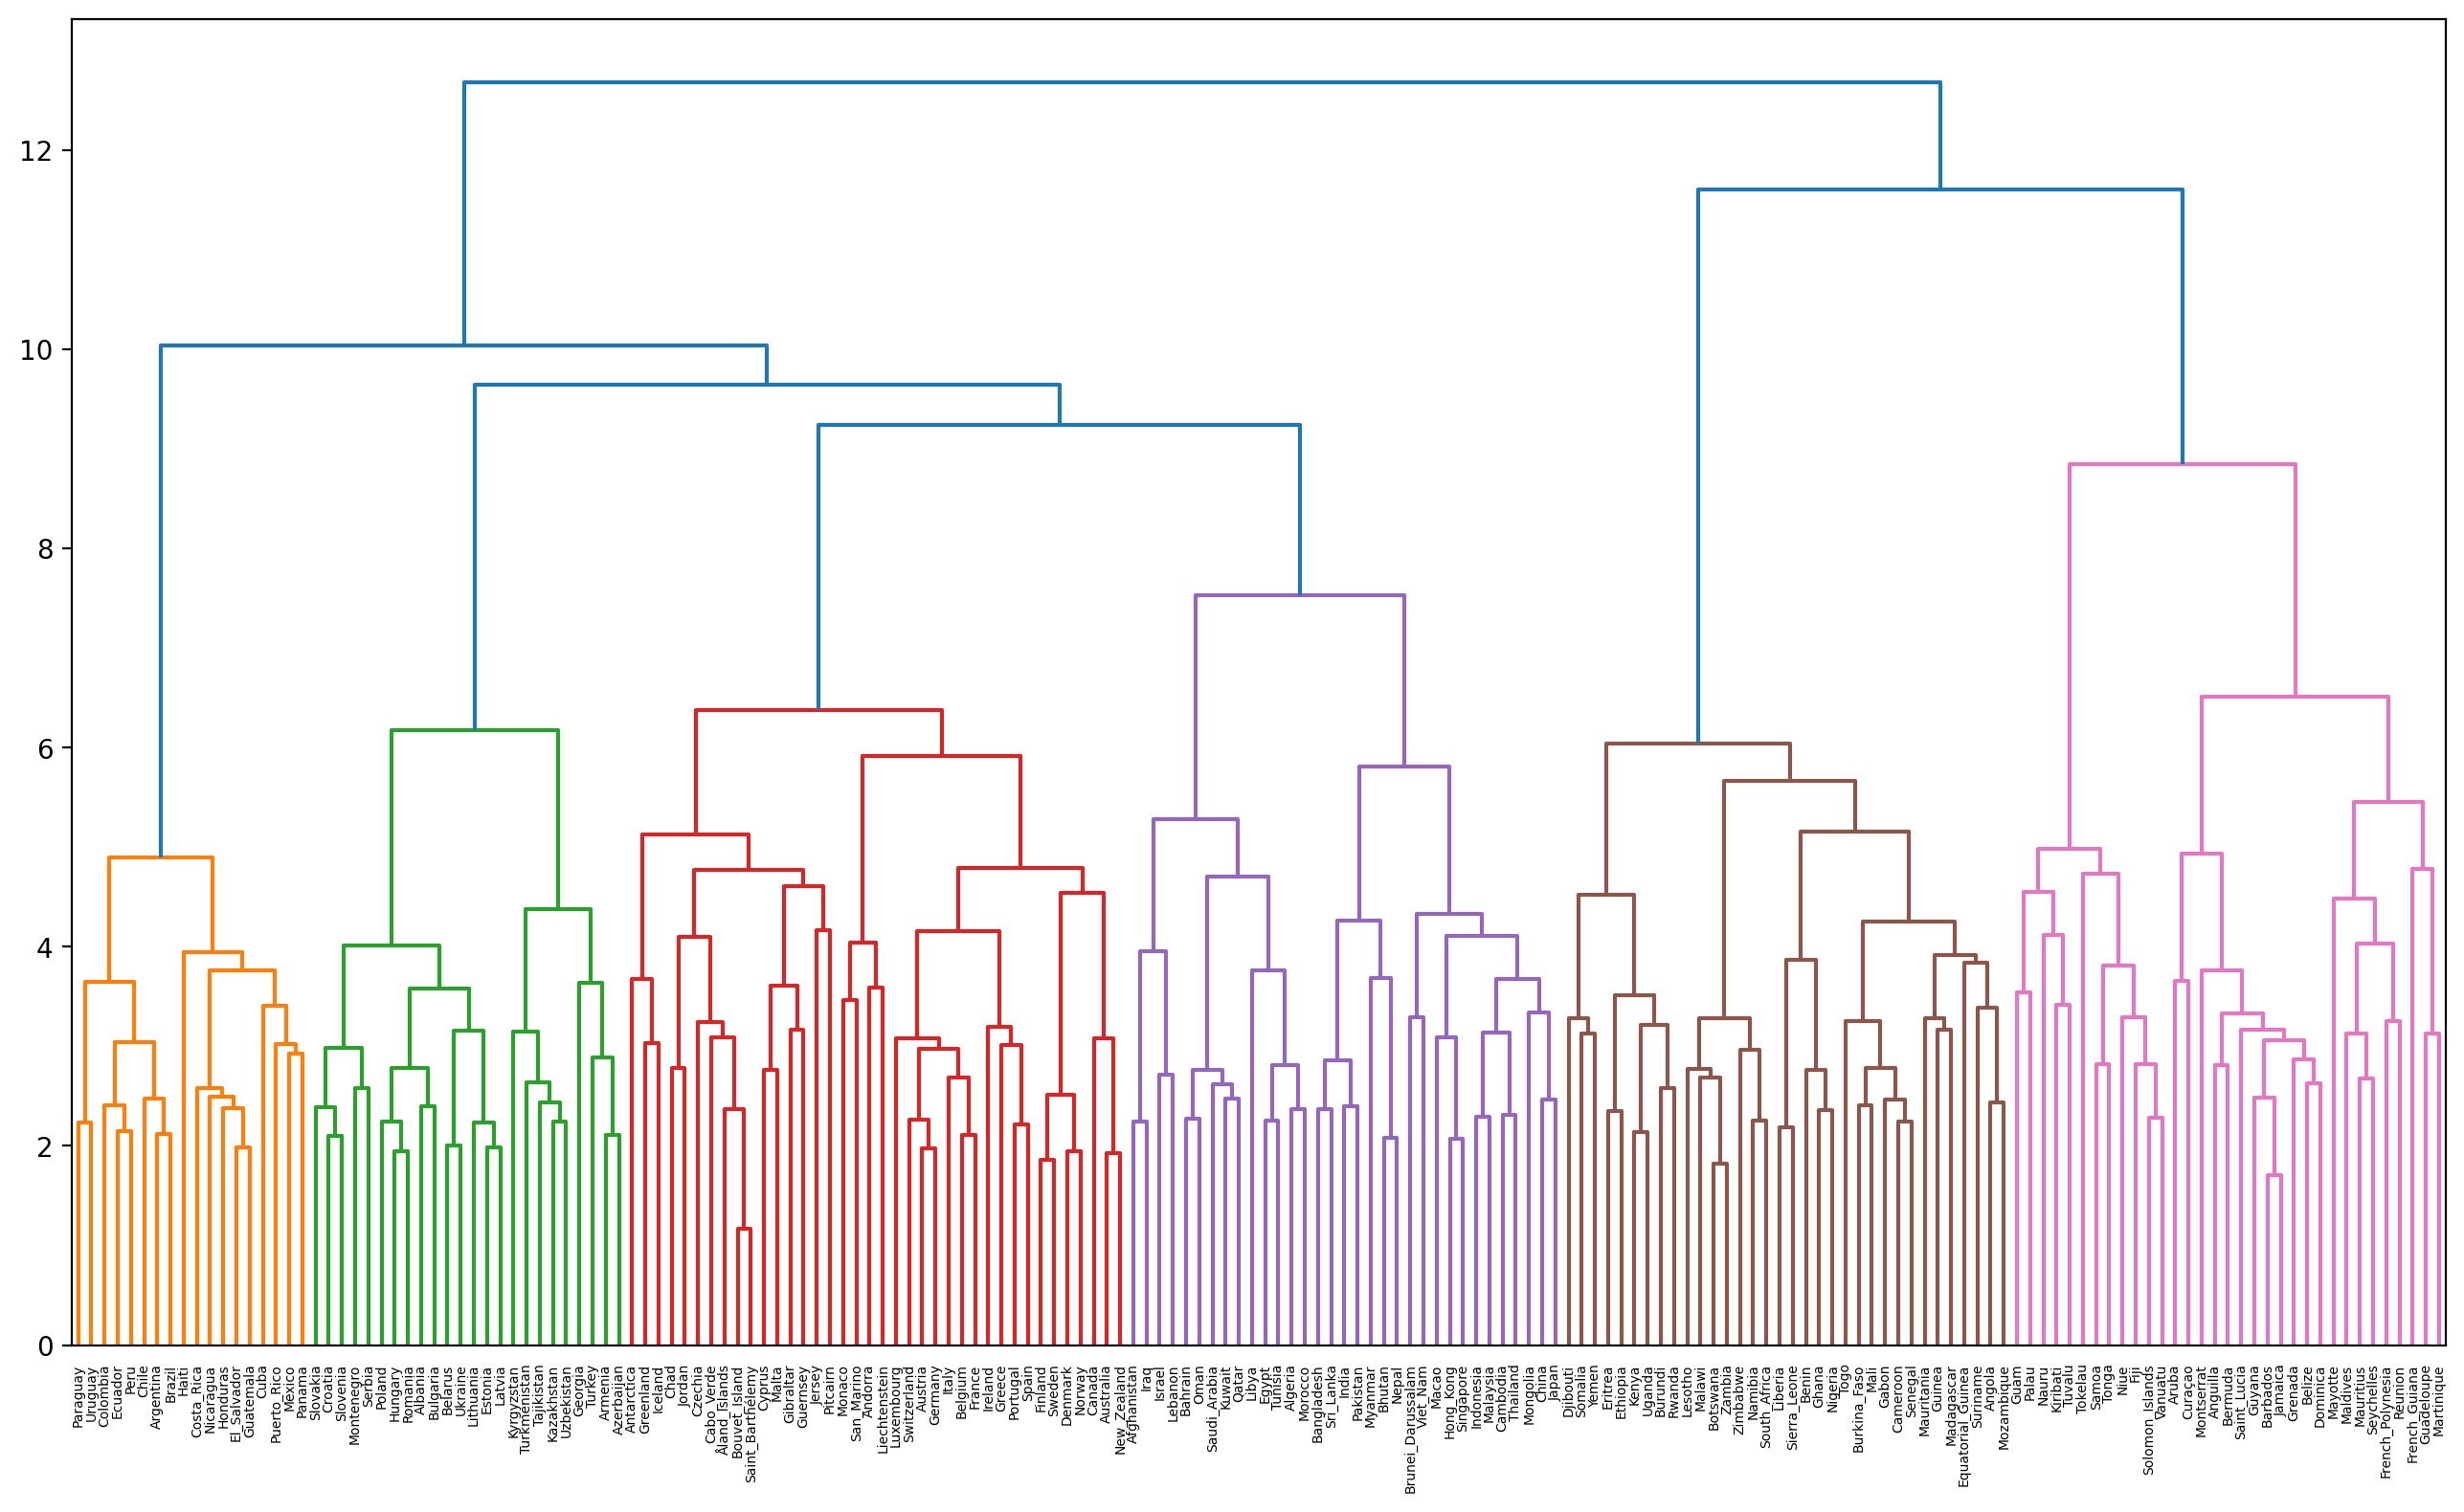

In [89]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
linkage_result = linkage(country_vectors, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=country_vectors.index)
plt.show()

## 69. t-SNEによる可視化Permalink
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [119]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
X_embedded = tsne.fit_transform(country_vectors)

ddf = pd.concat([country_vectors.reset_index(), pd.DataFrame(X_embedded, columns = ['col1', 'col2'])], axis = 1).set_index("country")
ddf = pd.concat([ddf,k_cluster.set_index("country")],axis = 1)
cluster_list = ddf["cluster"].unique()
colors =  ["r", "g", "b", "c", "m"]
plt.figure(figsize = (30, 30))
for index,cluster in enumerate(cluster_list):
    tmp_df = ddf[ddf.cluster == cluster]
    plt.scatter(tmp_df['col1'],  
                tmp_df['col2'],
                label = country,
                color = colors[index])

plt.legend(fontsize = 30)

AttributeError: 'numpy.int32' object has no attribute 'set_index'

In [121]:
cluster

4